In [15]:
import pandas as pd
file_path = r"C:\Users\frast\Desktop\cybers.csv"
df = pd.read_csv(file_path)
df.head()           # Mostra le prime 5 righe
df.info()           # Info su righe, colonne e tipi
df.describe()       # Statistiche descrittive (solo numeriche)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


Year  Financial Loss (in Million $)  Number of Affected Users  \
count  3000.000000                    3000.000000               3000.000000   
mean   2019.570333                      50.492970             504684.136333   
std       2.857932                      28.791415             289944.084972   
min    2015.000000                       0.500000                424.000000   
25%    2017.000000                      25.757500             255805.250000   
50%    2020.000000                      50.795000             504513.000000   
75%    2022.000000                      75.630000             758088.500000   
max    2024.000000                      99.990000             999635.000000   

       Incident Resolution Time (in Hours)  
count                          3000.000000  
mean                             36.476000  
std                              20.570768  
min                               1.000000  
25%                              19.000000  
50%                              37.000000  
75%                              55.000000  
max                              72.000000

In [16]:
categorical_columns = [
    'Country',
    'Attack Type',
    'Target Industry',
    'Attack Source',
    'Security Vulnerability Type',
    'Defense Mechanism Used'
]

for col in categorical_columns:
    print(f"\n--- {col} ---")
    print(f"Valori unici: {df[col].nunique()}")
    print(df[col].value_counts().head(10))



--- Country ---
Valori unici: 10
Country
UK           321
Brazil       310
India        308
France       305
Japan        305
Australia    297
Russia       295
Germany      291
USA          287
China        281
Name: count, dtype: int64

--- Attack Type ---
Valori unici: 6
Attack Type
DDoS                 531
Phishing             529
SQL Injection        503
Ransomware           493
Malware              485
Man-in-the-Middle    459
Name: count, dtype: int64

--- Target Industry ---
Valori unici: 7
Target Industry
IT                    478
Banking               445
Healthcare            429
Retail                423
Education             419
Telecommunications    403
Government            403
Name: count, dtype: int64

--- Attack Source ---
Valori unici: 4
Attack Source
Nation-state    794
Unknown         768
Insider         752
Hacker Group    686
Name: count, dtype: int64

--- Security Vulnerability Type ---
Valori unici: 4
Security Vulnerability Type
Zero-day              785
Social

In [17]:
# Seleziona variabili numeriche e categoriali
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("📊 Variabili numeriche:")
print(numerical_cols)

print("\n🔠 Variabili categoriali:")
print(categorical_cols)


📊 Variabili numeriche:
['Year', 'Financial Loss (in Million $)', 'Number of Affected Users', 'Incident Resolution Time (in Hours)']

🔠 Variabili categoriali:
['Country', 'Attack Type', 'Target Industry', 'Attack Source', 'Security Vulnerability Type', 'Defense Mechanism Used']


In [18]:
# Conta i valori mancanti per colonna
missing_values = df.isnull().sum()
print("🔎 Valori mancanti per colonna:")
print(missing_values[missing_values > 0])


🔎 Valori mancanti per colonna:
Series([], dtype: int64)


In [19]:
# Controllo valori mancanti
missing_values = df.isnull().sum()
missing = missing_values[missing_values > 0]

if missing.empty:
    print("✅ Nessun valore mancante nel dataset.")
else:
    print("⚠️ Valori mancanti trovati:")
    print(missing)


✅ Nessun valore mancante nel dataset.


In [20]:
for col in ['Country', 'Attack Type', 'Target Industry',
            'Attack Source', 'Security Vulnerability Type', 'Defense Mechanism Used']:
    print(f"\n--- {col} ---")
    print(df[col].value_counts(normalize=True).round(3) * 100)  # percentuali



--- Country ---
Country
UK           10.7
Brazil       10.3
India        10.3
France       10.2
Japan        10.2
Australia     9.9
Russia        9.8
Germany       9.7
USA           9.6
China         9.4
Name: proportion, dtype: float64

--- Attack Type ---
Attack Type
DDoS                 17.7
Phishing             17.6
SQL Injection        16.8
Ransomware           16.4
Malware              16.2
Man-in-the-Middle    15.3
Name: proportion, dtype: float64

--- Target Industry ---
Target Industry
IT                    15.9
Banking               14.8
Healthcare            14.3
Retail                14.1
Education             14.0
Telecommunications    13.4
Government            13.4
Name: proportion, dtype: float64

--- Attack Source ---
Attack Source
Nation-state    26.5
Unknown         25.6
Insider         25.1
Hacker Group    22.9
Name: proportion, dtype: float64

--- Security Vulnerability Type ---
Security Vulnerability Type
Zero-day              26.2
Social Engineering    24.9
Unpa

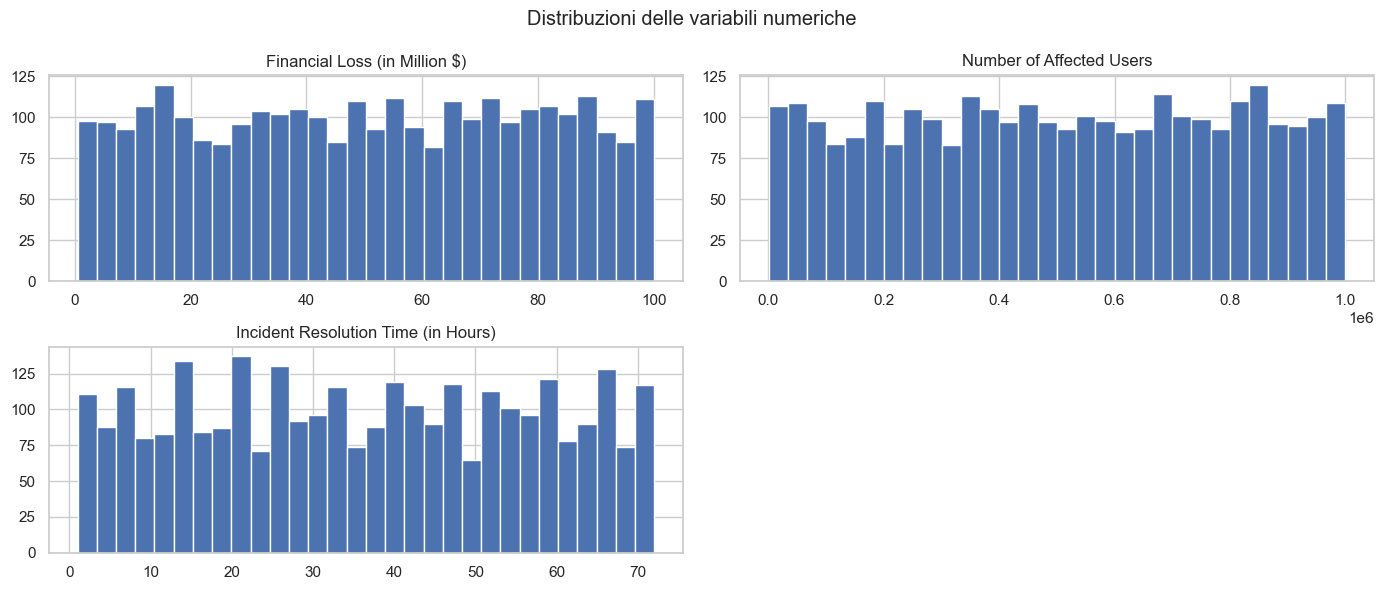

In [21]:
import matplotlib.pyplot as plt

df[['Financial Loss (in Million $)', 
    'Number of Affected Users', 
    'Incident Resolution Time (in Hours)']].hist(bins=30, figsize=(14,6))
plt.suptitle("Distribuzioni delle variabili numeriche")
plt.tight_layout()
plt.show()


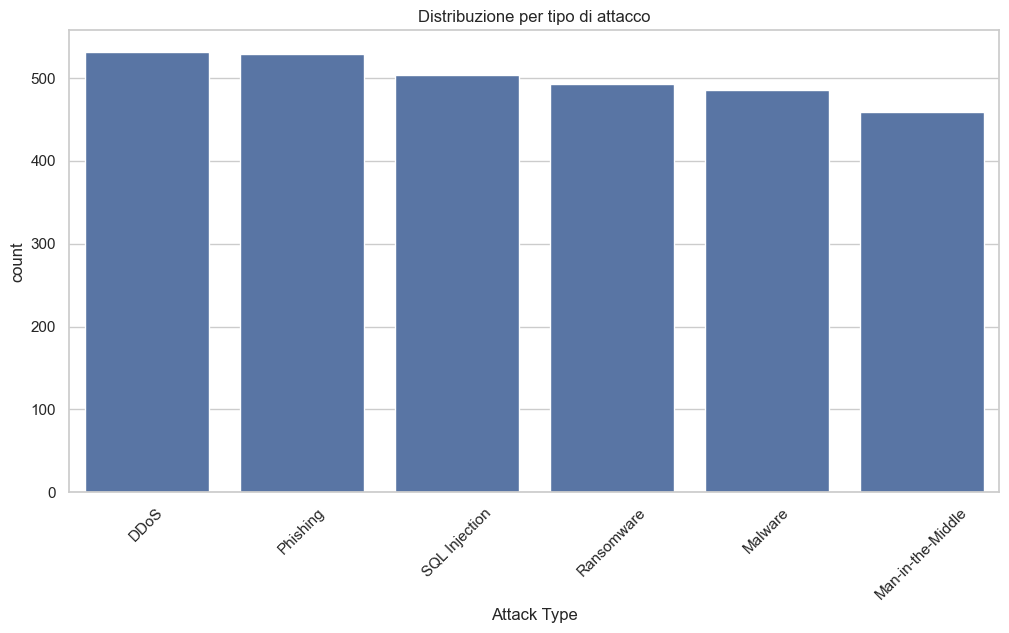

In [22]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Attack Type', order=df['Attack Type'].value_counts().index)
plt.title("Distribuzione per tipo di attacco")
plt.xticks(rotation=45)
plt.show()


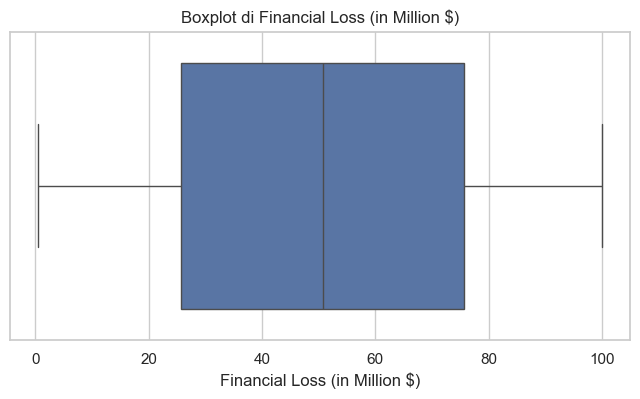

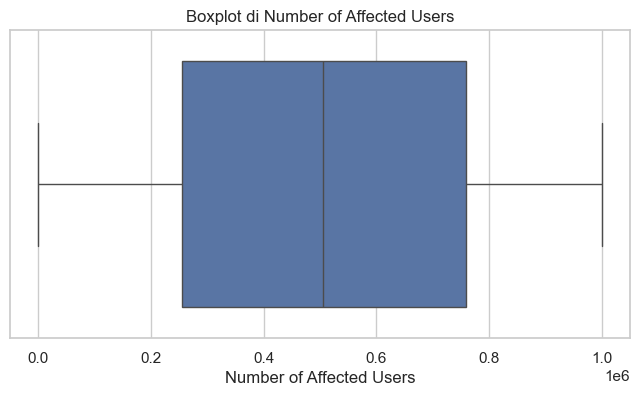

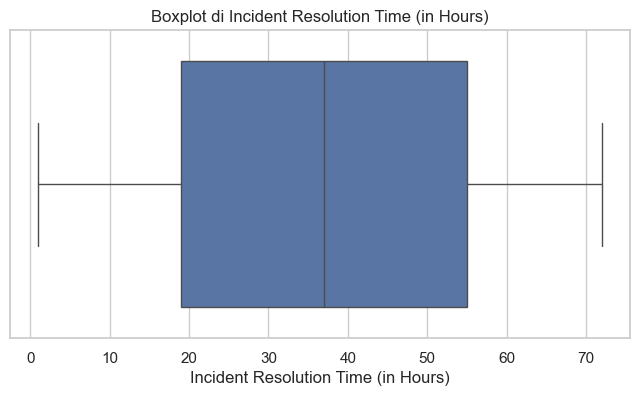

In [23]:
for col in ['Financial Loss (in Million $)', 'Number of Affected Users', 'Incident Resolution Time (in Hours)']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot di {col}")
    plt.show()


In [24]:
def detect_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return series[(series < lower) | (series > upper)]

for col in ['Financial Loss (in Million $)', 'Number of Affected Users', 'Incident Resolution Time (in Hours)']:
    outliers = detect_outliers(df[col])
    print(f"{col}: {len(outliers)} outlier trovati")


Financial Loss (in Million $): 0 outlier trovati
Number of Affected Users: 0 outlier trovati
Incident Resolution Time (in Hours): 0 outlier trovati


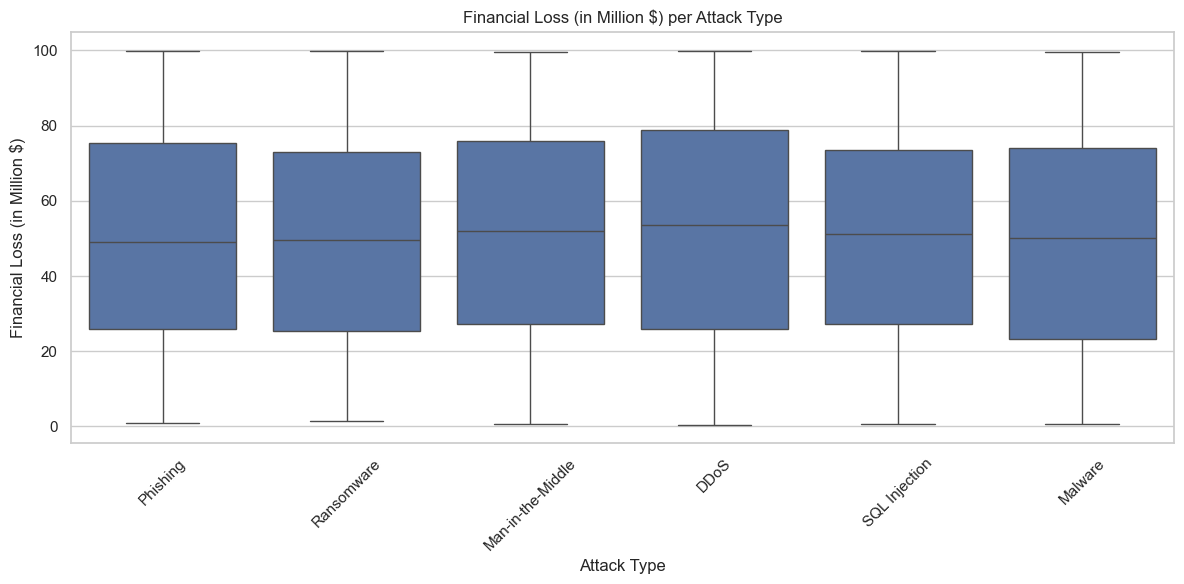

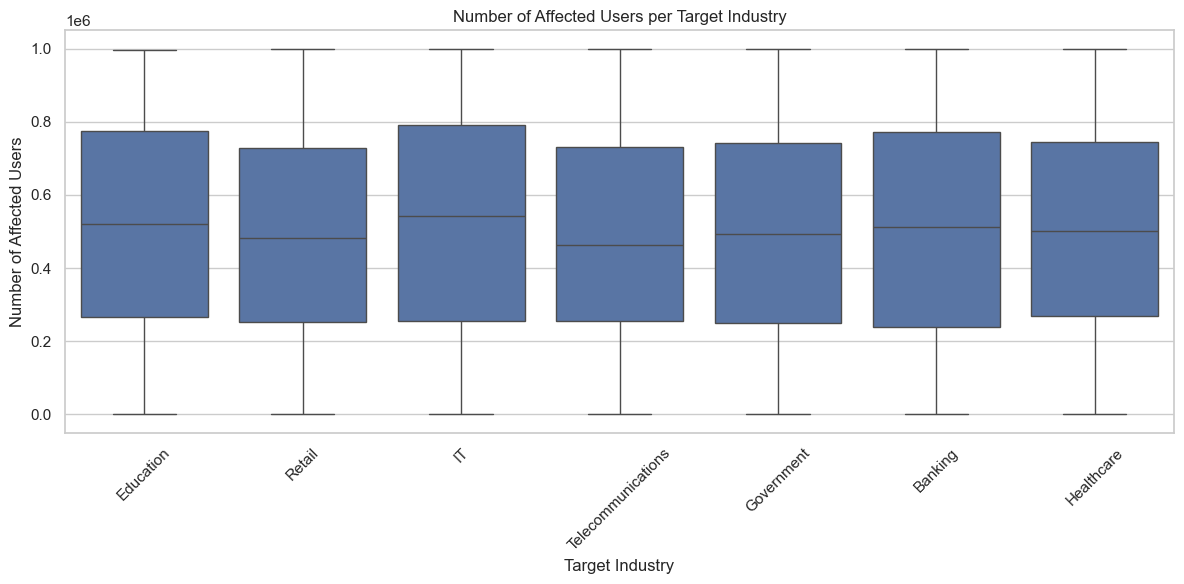

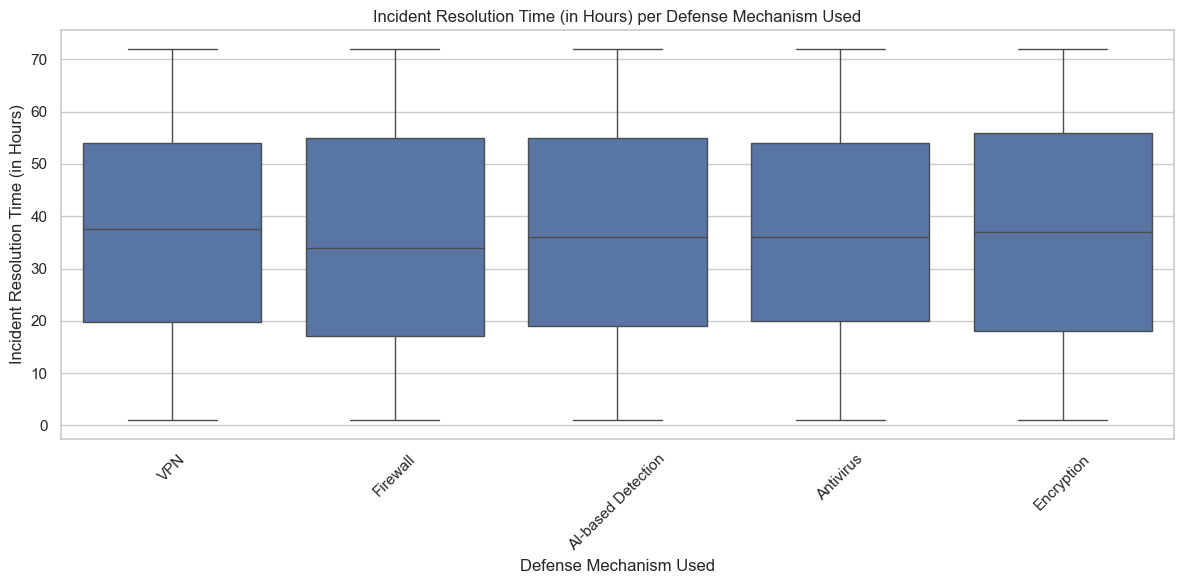

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configura la palette e lo stile
sns.set(style="whitegrid")

# Lista di confronti utili
comparisons = [
    ("Attack Type", "Financial Loss (in Million $)"),
    ("Target Industry", "Number of Affected Users"),
    ("Defense Mechanism Used", "Incident Resolution Time (in Hours)")
]

# Boxplot per ogni confronto
for cat, num in comparisons:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x=cat, y=num)
    plt.title(f"{num} per {cat}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


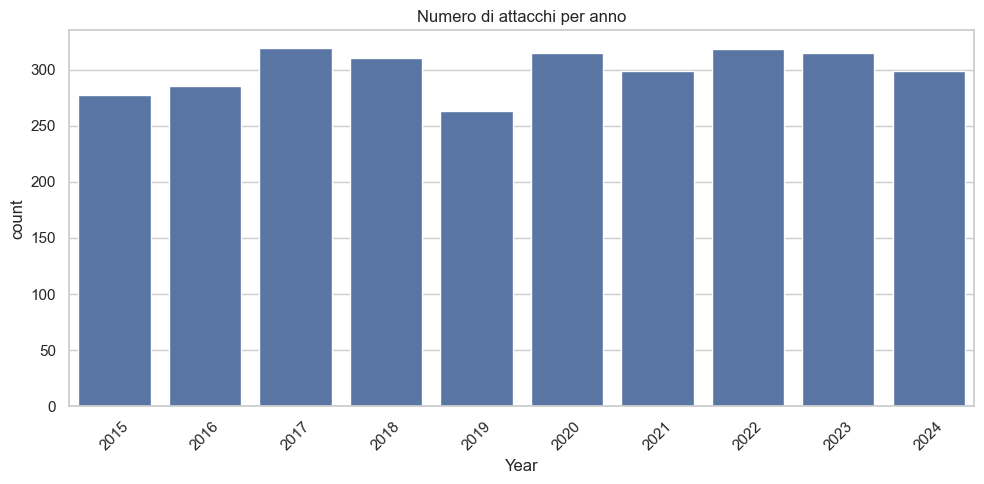

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Year')
plt.title("Numero di attacchi per anno")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

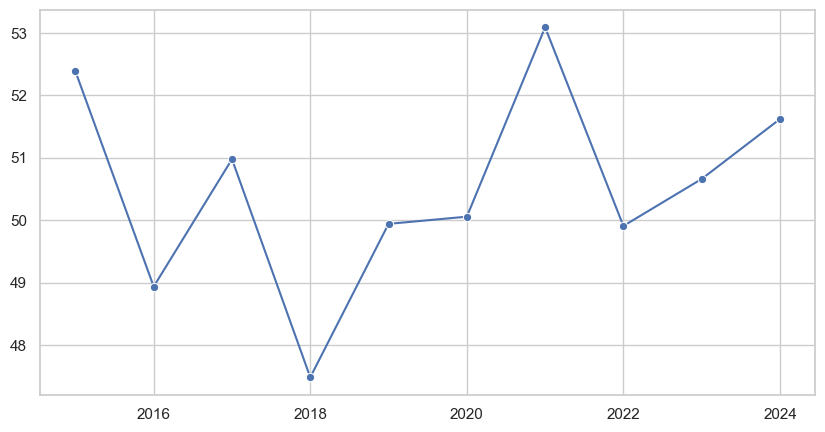

In [27]:
yearly = df.groupby("Year")["Financial Loss (in Million $)"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=yearly, x='Year', y='Financial Loss (in Million $)', marker="o")
plt.title("Perdita media per attacco nel tempo")
plt.tight_layout()
plt.show()


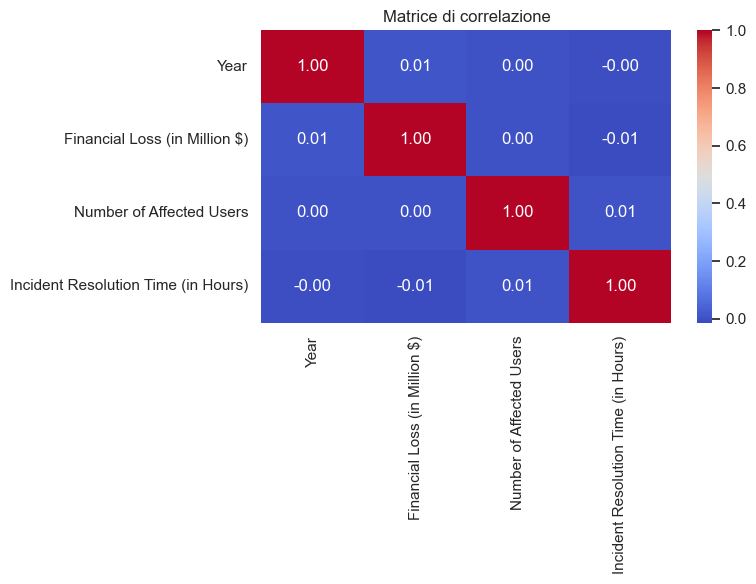

In [29]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice di correlazione")
plt.tight_layout()
plt.show()


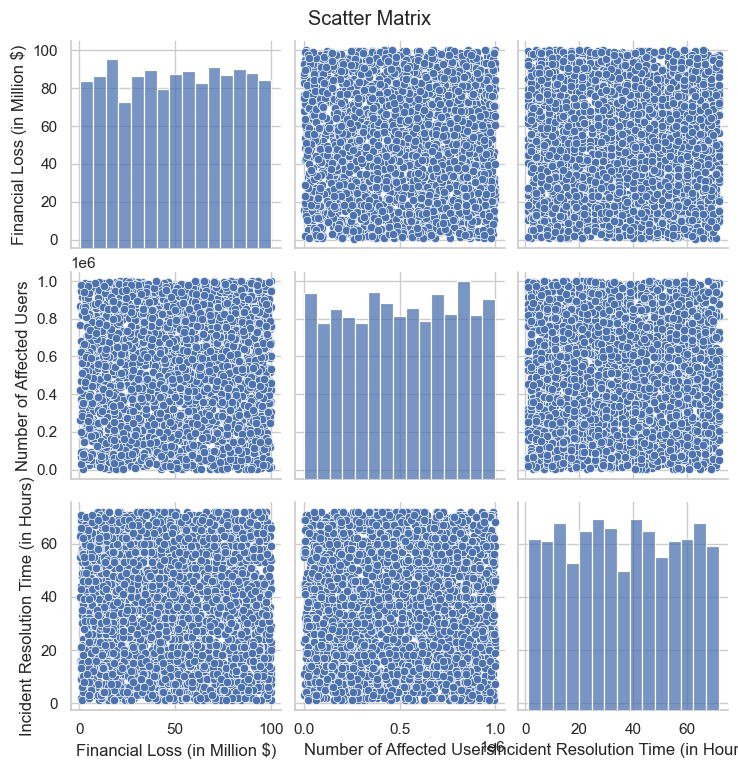

In [30]:
sns.pairplot(df[[
    "Financial Loss (in Million $)",
    "Number of Affected Users",
    "Incident Resolution Time (in Hours)"
]])
plt.suptitle("Scatter Matrix", y=1.02)
plt.show()


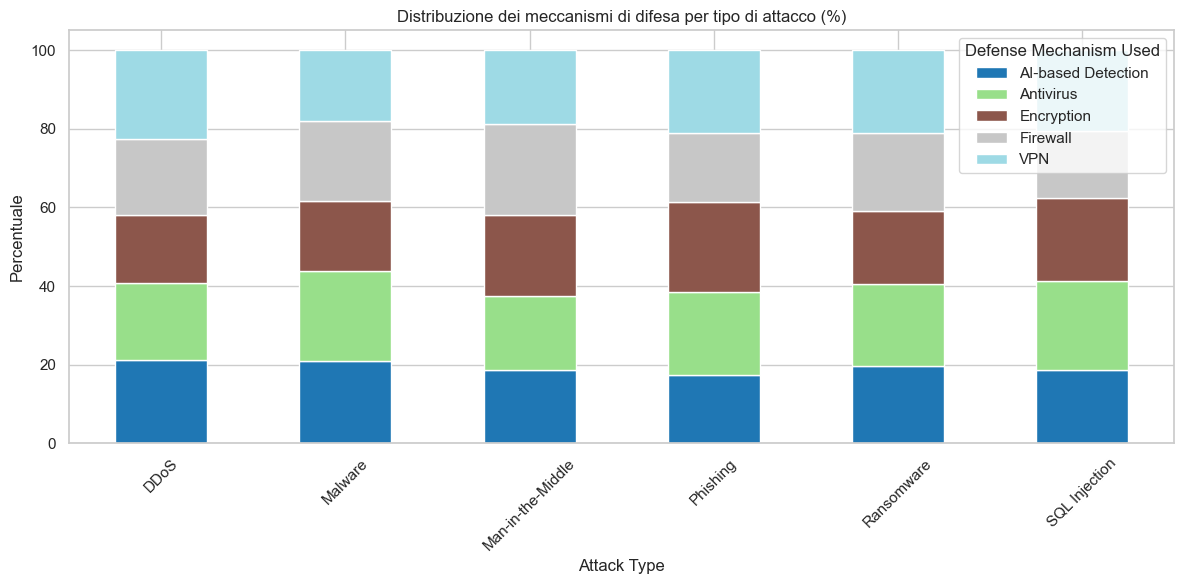

In [31]:
cross = pd.crosstab(df['Attack Type'], df['Defense Mechanism Used'], normalize='index') * 100
cross.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title("Distribuzione dei meccanismi di difesa per tipo di attacco (%)")
plt.ylabel("Percentuale")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [32]:
print(df['Year'].dtype)
print(df['Financial Loss (in Million $)'].dtype)


int64
float64


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

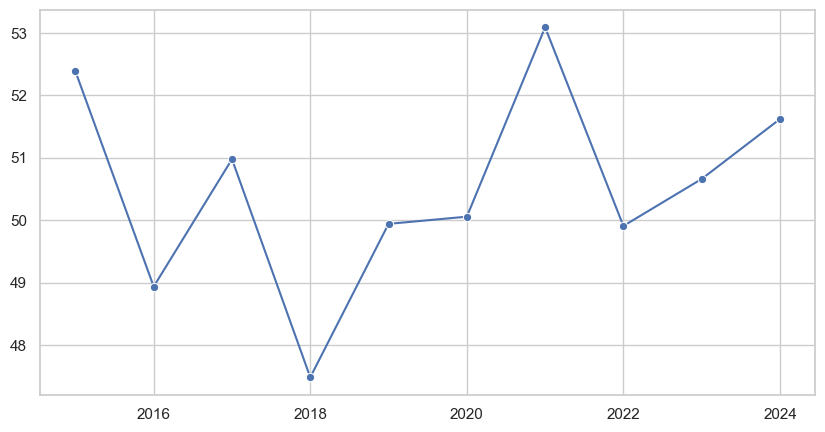

In [33]:
# Raggruppamento per anno e media delle perdite
yearly = df.groupby("Year", as_index=False)["Financial Loss (in Million $)"].mean()
yearly.dropna(inplace=True)

# Line plot corretto
plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly, x='Year', y='Financial Loss (in Million $)', marker="o")
plt.title("Perdita media per attacco nel tempo")
plt.tight_layout()
plt.show()


In [34]:
# Tipo di attacco vs Settore colpito
ct1 = pd.crosstab(df['Attack Type'], df['Target Industry'], normalize='index') * 100
print(ct1.round(1))

# Fonte dell'attacco vs Tipo di vulnerabilità
ct2 = pd.crosstab(df['Attack Source'], df['Security Vulnerability Type'], normalize='index') * 100
print(ct2.round(1))


Target Industry    Banking  Education  Government  Healthcare    IT  Retail  \
Attack Type                                                                   
DDoS                  13.4       13.7        13.4        14.7  17.1    11.7   
Malware               12.6       14.4        13.2        16.7  13.8    14.0   
Man-in-the-Middle     16.8       14.2        11.5        12.6  17.4    15.3   
Phishing              18.1       13.8        12.9        11.9  16.8    16.8   
Ransomware            14.0       14.4        14.6        15.6  15.0    14.4   
SQL Injection         14.1       13.3        14.9        14.3  15.3    12.5   

Target Industry    Telecommunications  
Attack Type                            
DDoS                             16.0  
Malware                          15.3  
Man-in-the-Middle                12.2  
Phishing                          9.6  
Ransomware                       12.0  
SQL Injection                    15.5  
Security Vulnerability Type  Social Engineering

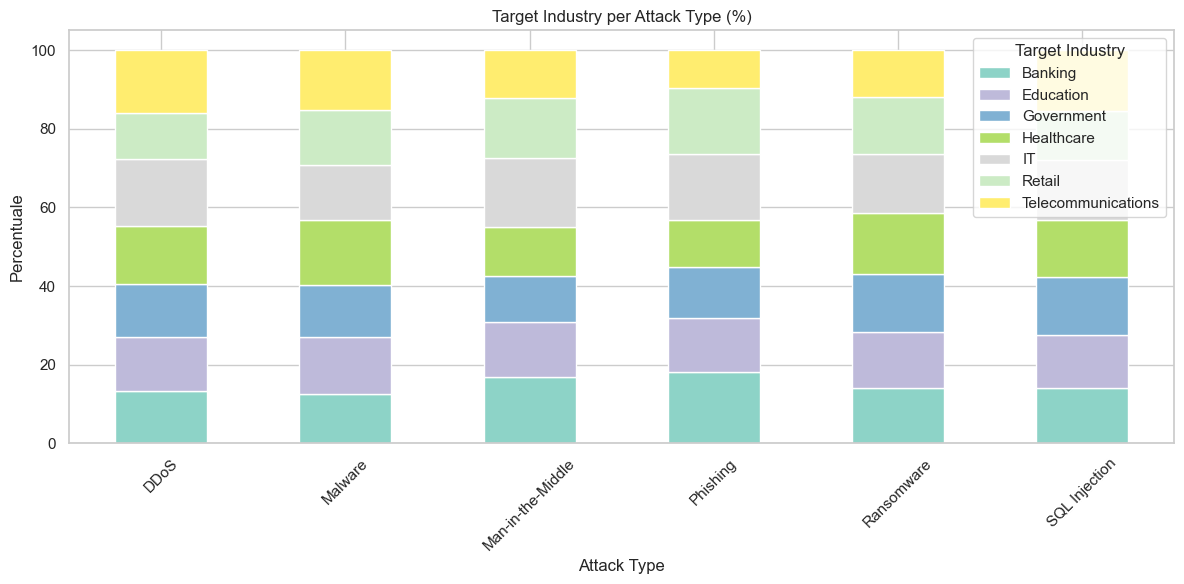

In [35]:
ct1.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set3')
plt.title("Target Industry per Attack Type (%)")
plt.ylabel("Percentuale")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


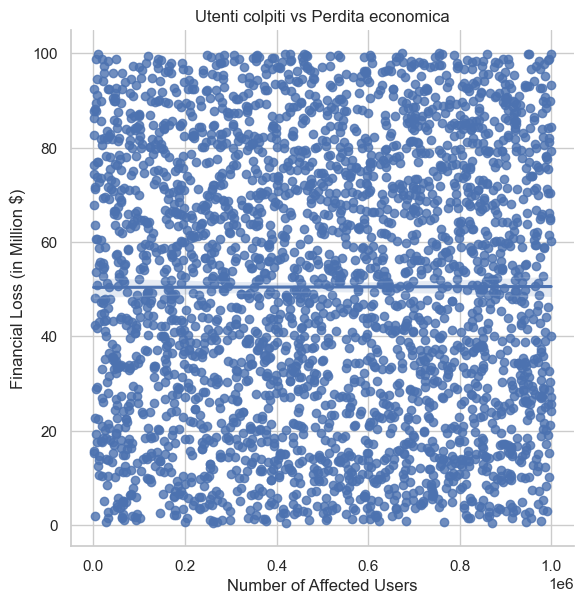

In [36]:
sns.lmplot(data=df, x='Number of Affected Users', y='Financial Loss (in Million $)', height=6)
plt.title("Utenti colpiti vs Perdita economica")
plt.show()


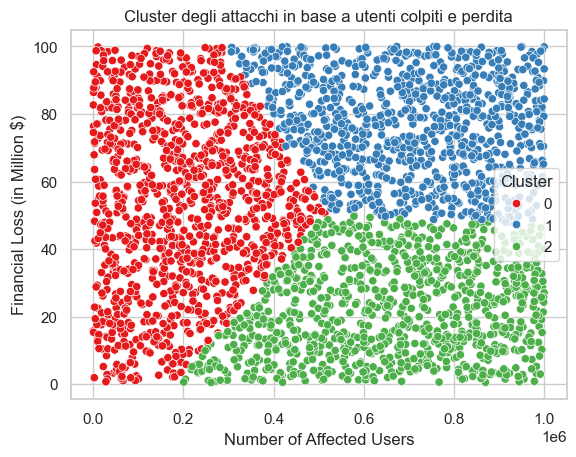

In [37]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selezione delle feature
features = df[['Financial Loss (in Million $)', 'Number of Affected Users', 'Incident Resolution Time (in Hours)']]

# Normalizzazione
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Clustering con KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualizza i cluster
sns.scatterplot(data=df, x='Number of Affected Users', y='Financial Loss (in Million $)', hue='Cluster', palette='Set1')
plt.title("Cluster degli attacchi in base a utenti colpiti e perdita")
plt.show()


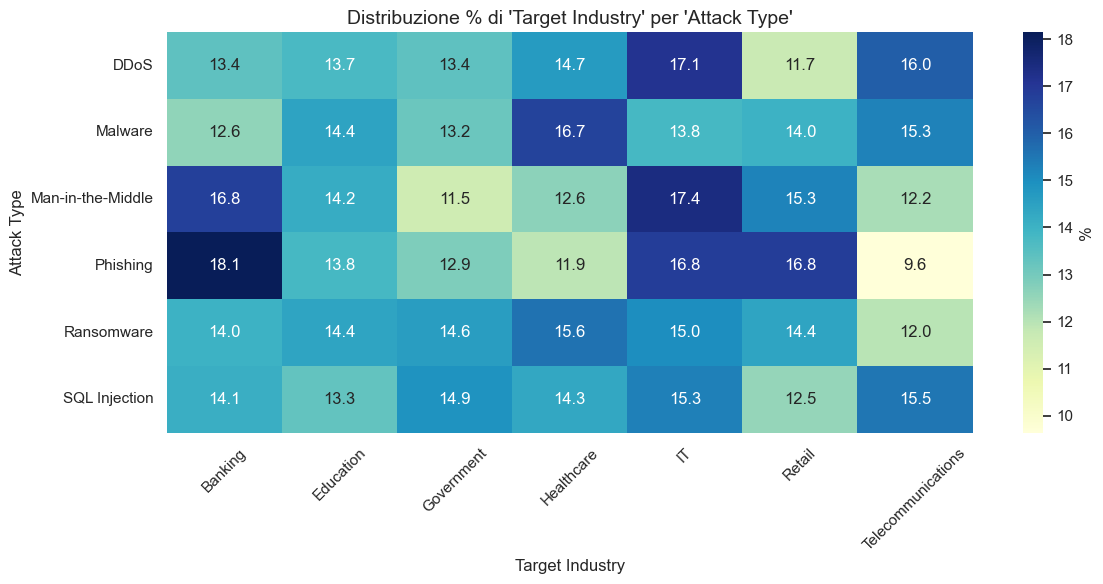

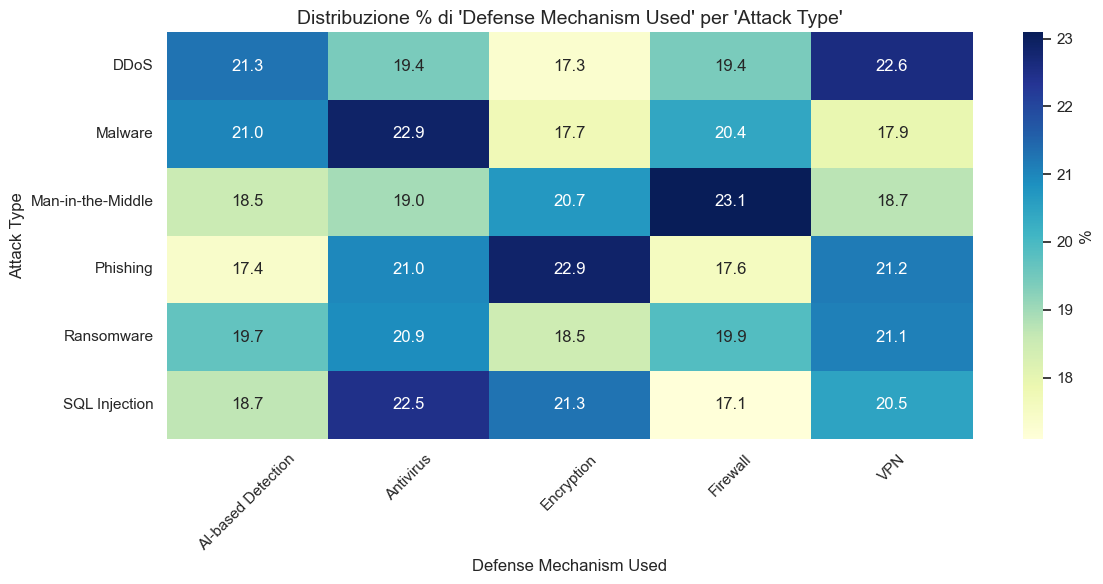

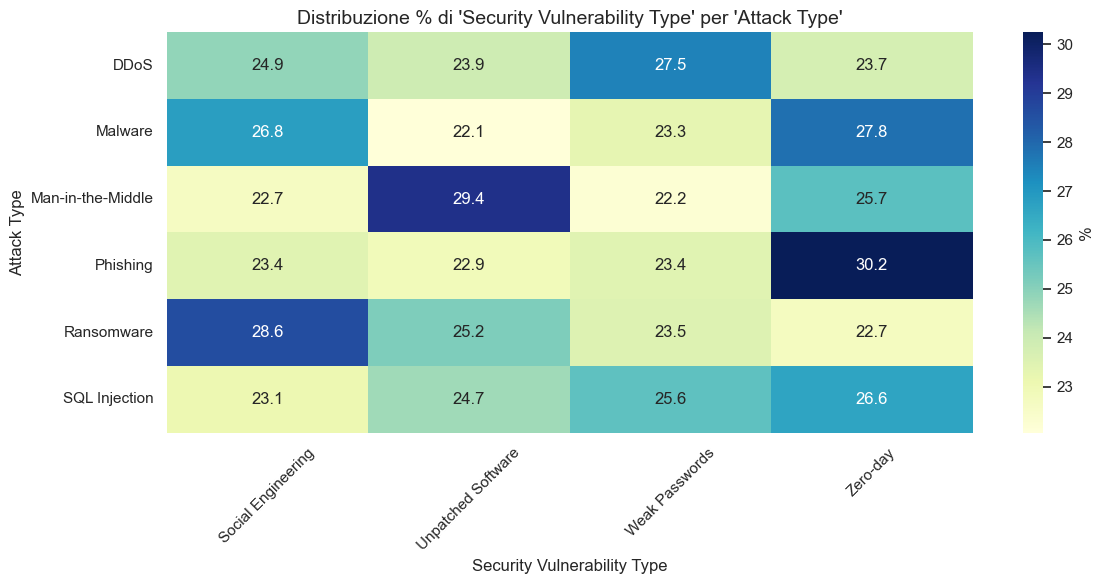

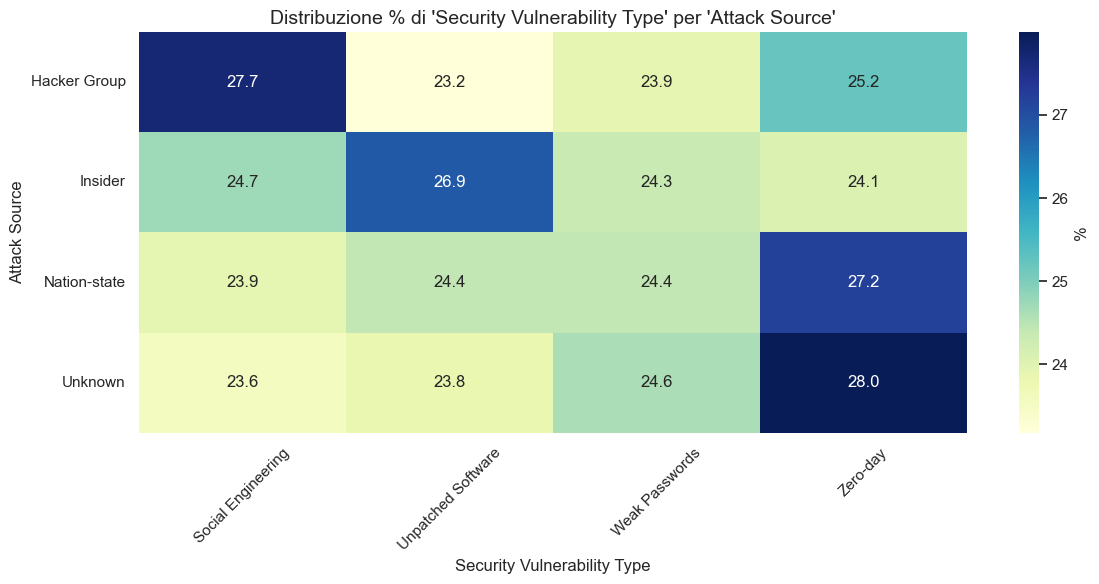

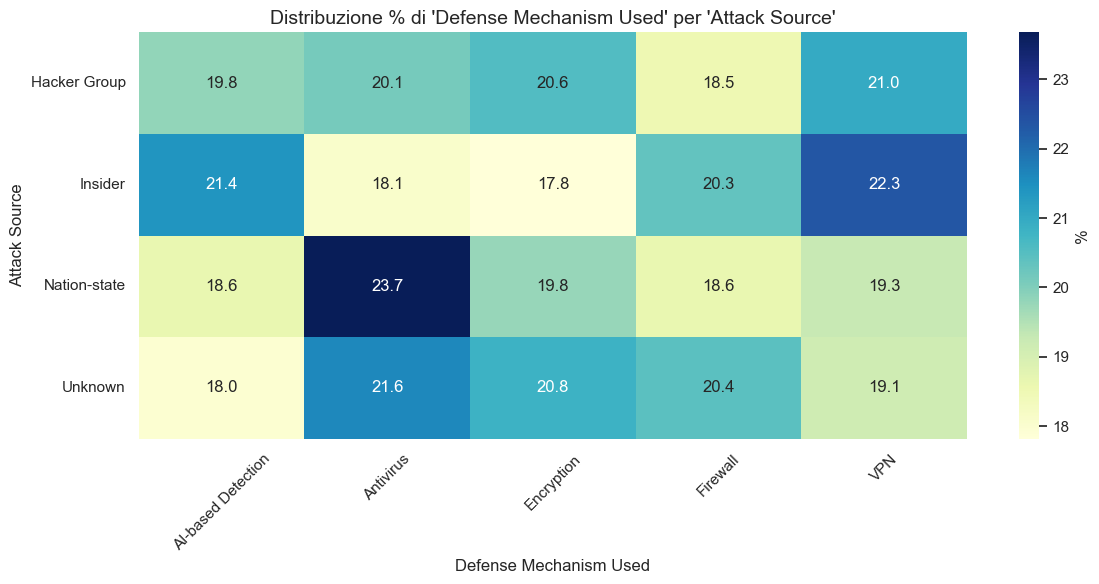

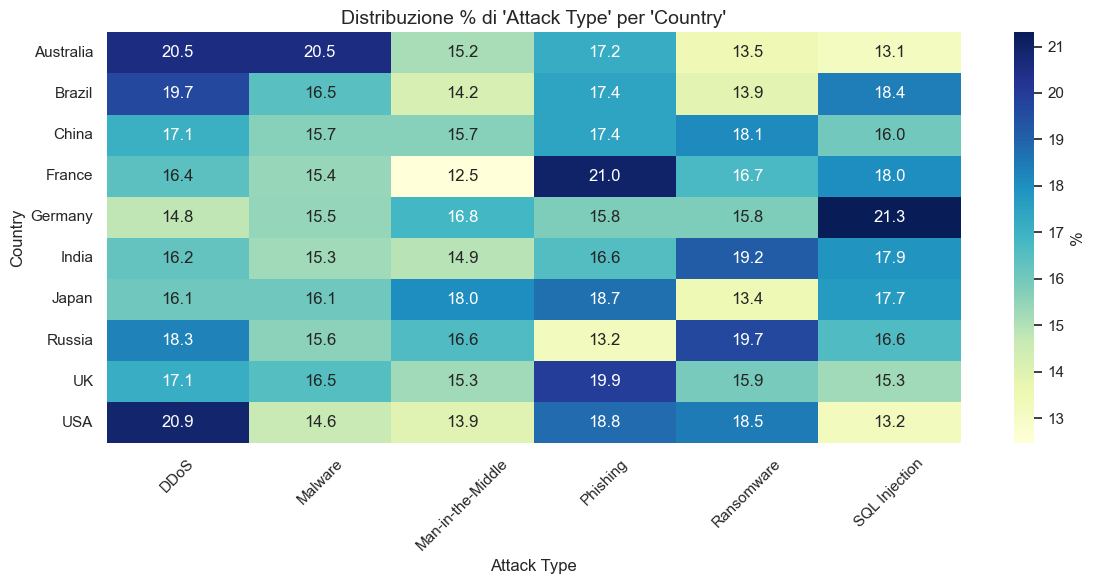

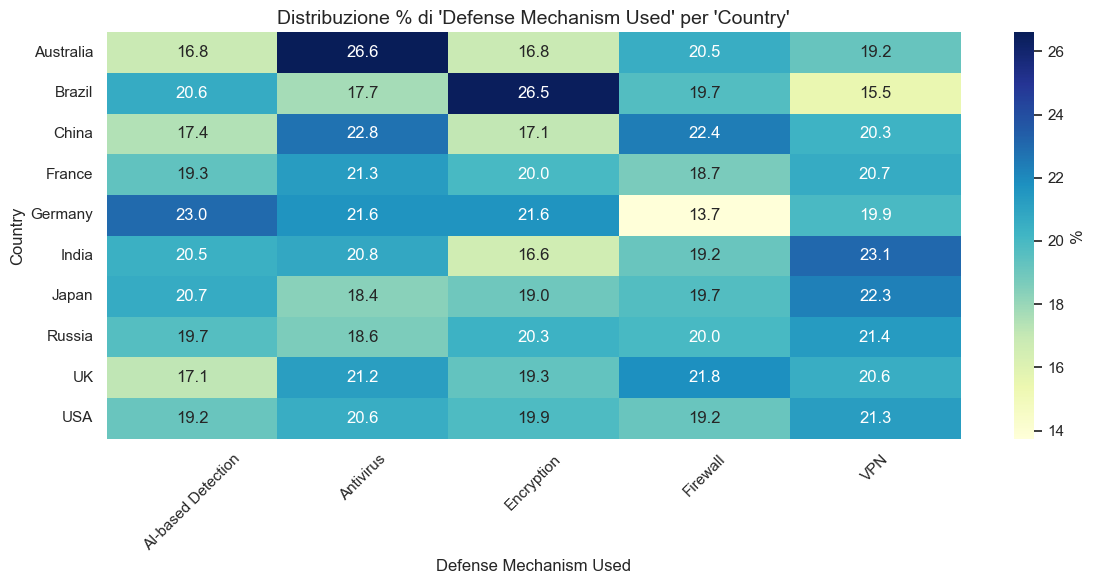

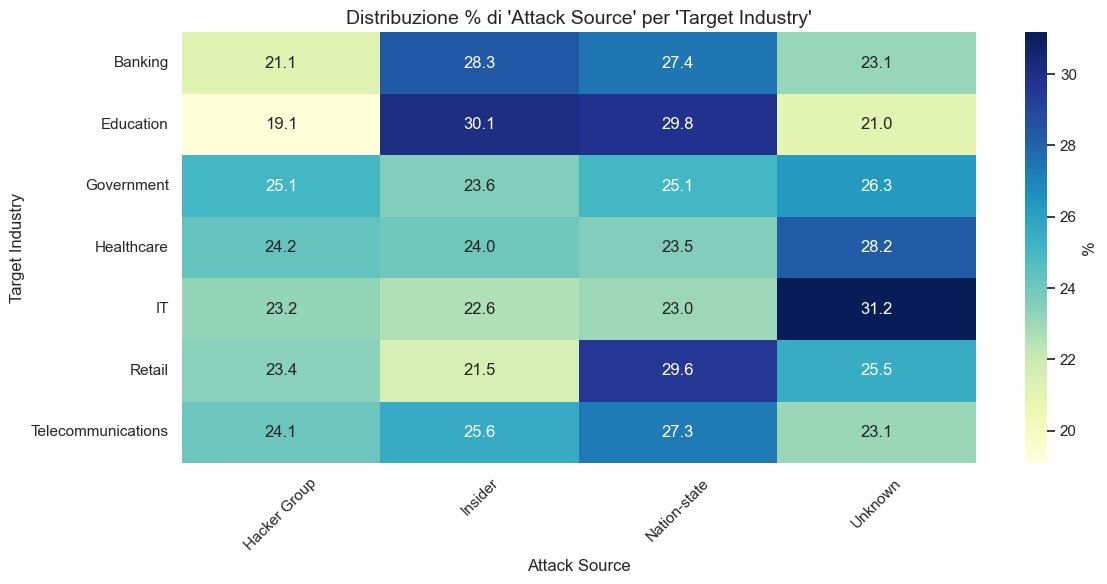

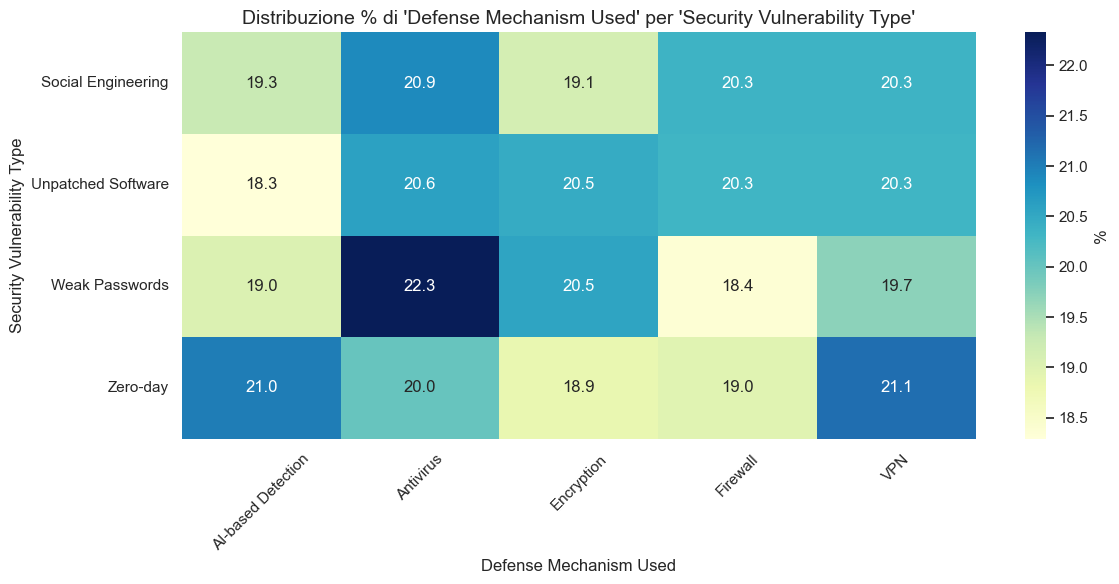

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Impostazioni estetiche
sns.set(style="whitegrid")

# Lista di coppie categoriali da analizzare
crosstab_configs = [
    ("Attack Type", "Target Industry"),
    ("Attack Type", "Defense Mechanism Used"),
    ("Attack Type", "Security Vulnerability Type"),
    ("Attack Source", "Security Vulnerability Type"),
    ("Attack Source", "Defense Mechanism Used"),
    ("Country", "Attack Type"),
    ("Country", "Defense Mechanism Used"),
    ("Target Industry", "Attack Source"),
    ("Security Vulnerability Type", "Defense Mechanism Used"),
]

# Funzione per generare la crosstab e la heatmap
def plot_crosstab_heatmap(row_var, col_var):
    ct = pd.crosstab(df[row_var], df[col_var], normalize='index') * 100
    plt.figure(figsize=(12, 6))
    sns.heatmap(ct, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': '%'})
    plt.title(f"Distribuzione % di '{col_var}' per '{row_var}'", fontsize=14)
    plt.ylabel(row_var)
    plt.xlabel(col_var)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Esegui tutte le combinazioni
for row_var, col_var in crosstab_configs:
    plot_crosstab_heatmap(row_var, col_var)


In [39]:
# Statistiche descrittive per tipo di attacco e settore
grouped_stats = df.groupby(['Attack Type', 'Target Industry'])[
    ['Financial Loss (in Million $)', 'Number of Affected Users', 'Incident Resolution Time (in Hours)']
].agg(['mean', 'std', 'count']).round(2)

# Visualizza la tabella
grouped_stats


Financial Loss (in Million $)         \
                                                              mean    std   
Attack Type       Target Industry                                           
DDoS              Banking                                    55.56  29.80   
                  Education                                  52.74  28.24   
                  Government                                 56.92  27.84   
                  Healthcare                                 48.72  31.72   
                  IT                                         51.86  27.82   
                  Retail                                     46.21  30.22   
                  Telecommunications                         51.89  29.18   
Malware           Banking                                    43.61  28.54   
                  Education                                  47.88  30.52   
                  Government                                 51.01  26.00   
                  Healthcare                                 50.79  27.55   
                  IT                                         50.92  31.51   
                  Retail                                     49.22  27.20   
                  Telecommunications                         51.61  32.56   
Man-in-the-Middle Banking                                    49.86  28.27   
                  Education                                  43.83  28.18   
                  Government                                 55.61  24.90   
                  Healthcare                                 47.20  29.41   
                  IT                                         55.26  26.28   
                  Retail                                     51.52  29.47   
                  Telecommunications                         56.25  29.66   
Phishing          Banking                                    53.60  29.95   
                  Education                                  47.19  31.64   
                  Government                                 51.71  28.84   
                  Healthcare                                 50.49  28.12   
                  IT                                         49.02  28.49   
                  Retail                                     49.77  29.05   
                  Telecommunications                         51.24  27.95   
Ransomware        Banking                                    49.92  28.06   
                  Education                                  47.89  29.86   
                  Government                                 50.85  30.54   
                  Healthcare                                 46.25  28.02   
                  IT                                         52.73  24.55   
                  Retail                                     50.61  27.15   
                  Telecommunications                         49.42  30.88   
SQL Injection     Banking                                    52.64  28.17   
                  Education                                  47.40  30.14   
                  Government                                 50.32  28.96   
                  Healthcare                                 50.66  28.26   
                  IT                                         51.86  28.63   
                  Retail                                     52.04  27.69   
                  Telecommunications                         45.51  28.47   

                                           Number of Affected Users  \
                                     count                     mean   
Attack Type       Target Industry                                     
DDoS              Banking               71                516340.01   
                  Education             73                447543.53   
                  Government            71                511390.24   
                  Healthcare            78                500768.69   
                  IT                    91                560951.19   
   

In [40]:
from sklearn.preprocessing import StandardScaler

# Selezione delle feature
features = df[['Financial Loss (in Million $)', 'Number of Affected Users', 'Incident Resolution Time (in Hours)']]

# Standardizzazione
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [41]:
from sklearn.cluster import KMeans

# Clustering con 3 gruppi
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster_KMeans'] = kmeans.fit_predict(scaled_features)


In [42]:
from sklearn.cluster import DBSCAN

# Clustering DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=10)
df['Cluster_DBSCAN'] = dbscan.fit_predict(scaled_features)


In [43]:
from sklearn.cluster import AgglomerativeClustering

# Clustering gerarchico
agg = AgglomerativeClustering(n_clusters=3)
df['Cluster_Agg'] = agg.fit_predict(scaled_features)


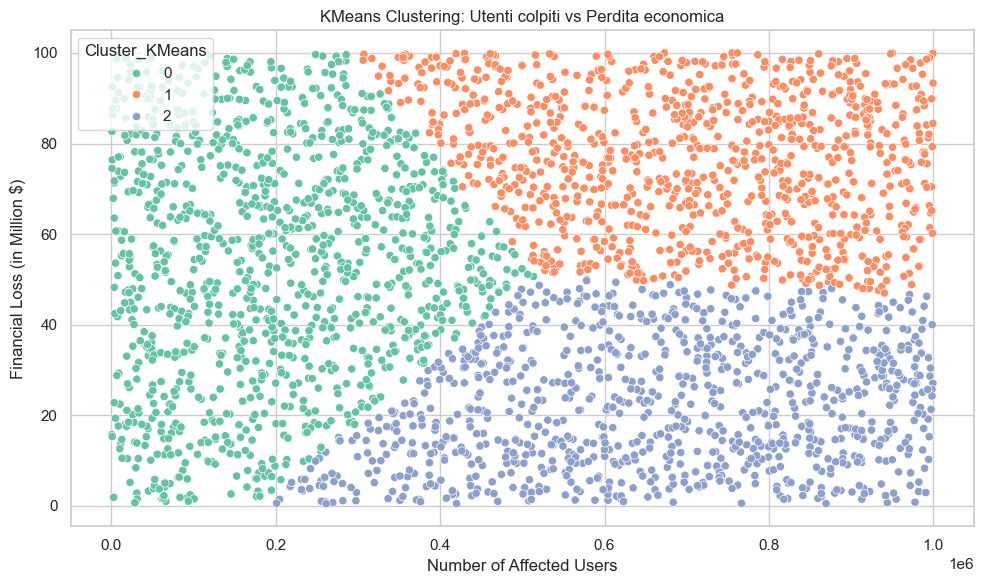

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Number of Affected Users', y='Financial Loss (in Million $)',
                hue='Cluster_KMeans', palette='Set2')
plt.title("KMeans Clustering: Utenti colpiti vs Perdita economica")
plt.tight_layout()
plt.show()


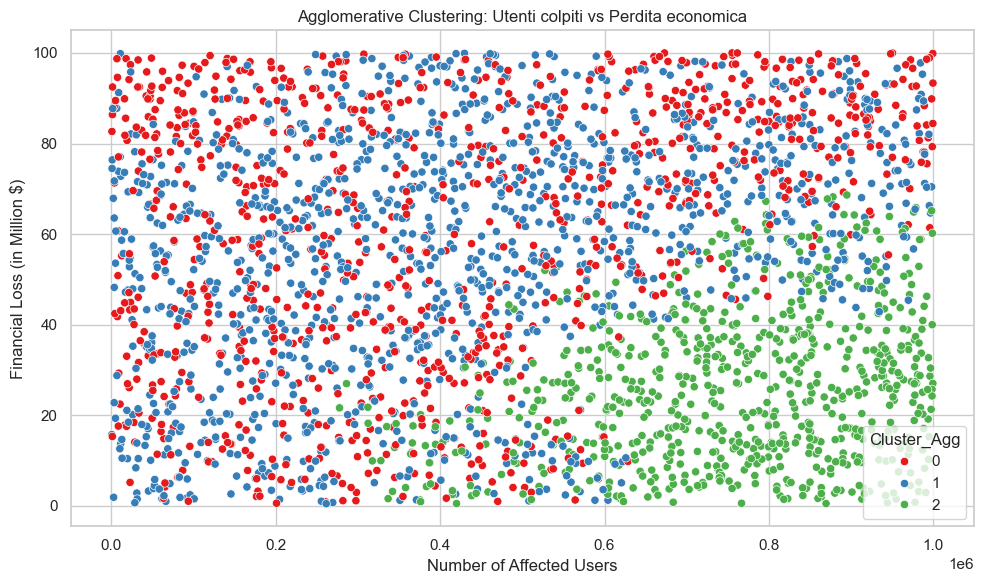

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Number of Affected Users', y='Financial Loss (in Million $)',
                hue='Cluster_Agg', palette='Set1')
plt.title("Agglomerative Clustering: Utenti colpiti vs Perdita economica")
plt.tight_layout()
plt.show()


C:\Users\frast\AppData\Local\Temp\ipykernel_20048\3788491607.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Attack Type', y='Financial Loss (in Million $)', estimator='mean', ci=None)


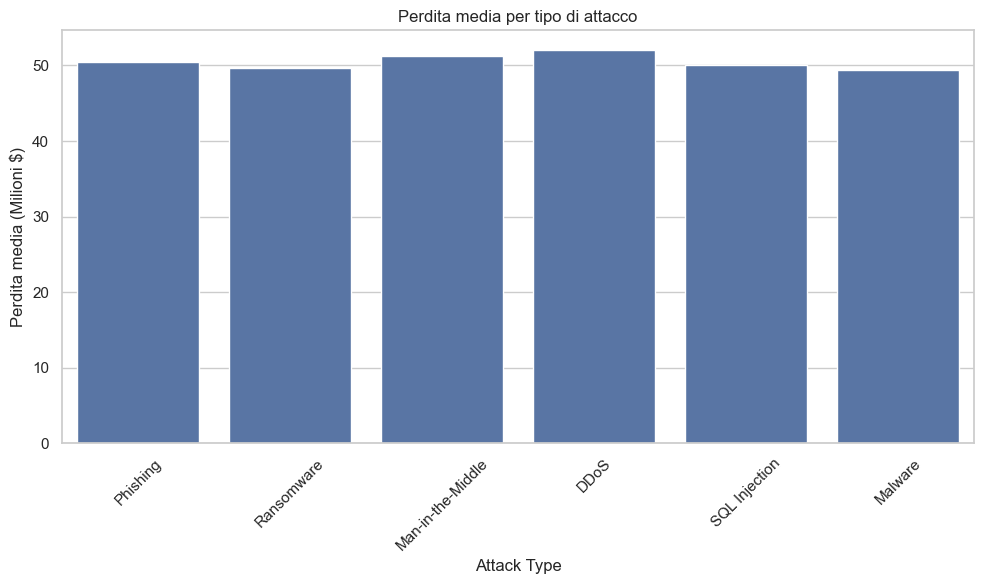

In [46]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Attack Type', y='Financial Loss (in Million $)', estimator='mean', ci=None)
plt.title("Perdita media per tipo di attacco")
plt.ylabel("Perdita media (Milioni $)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\frast\AppData\Local\Temp\ipykernel_20048\2571943852.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Target Industry', y='Incident Resolution Time (in Hours)', estimator='mean', ci=None)


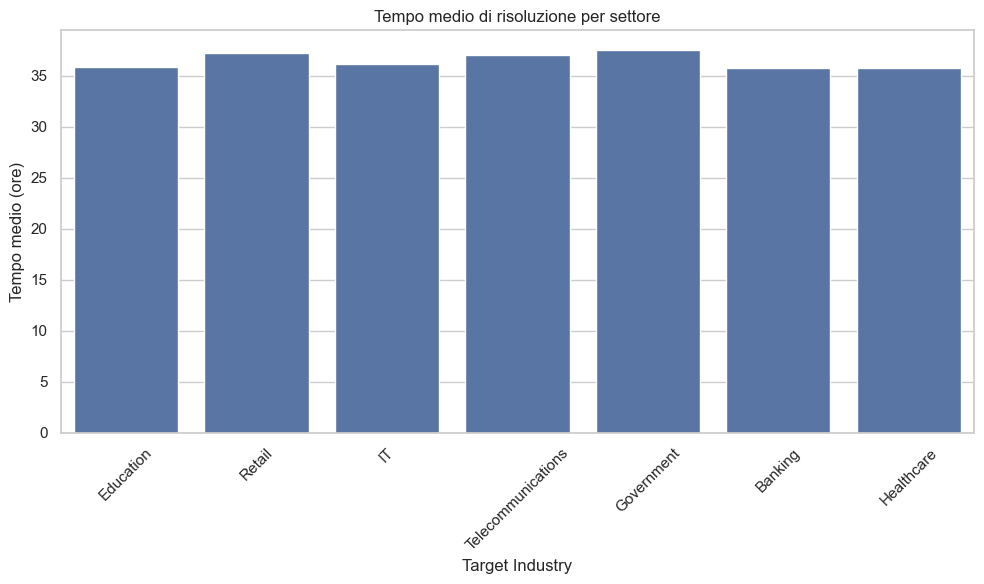

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Target Industry', y='Incident Resolution Time (in Hours)', estimator='mean', ci=None)
plt.title("Tempo medio di risoluzione per settore")
plt.ylabel("Tempo medio (ore)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


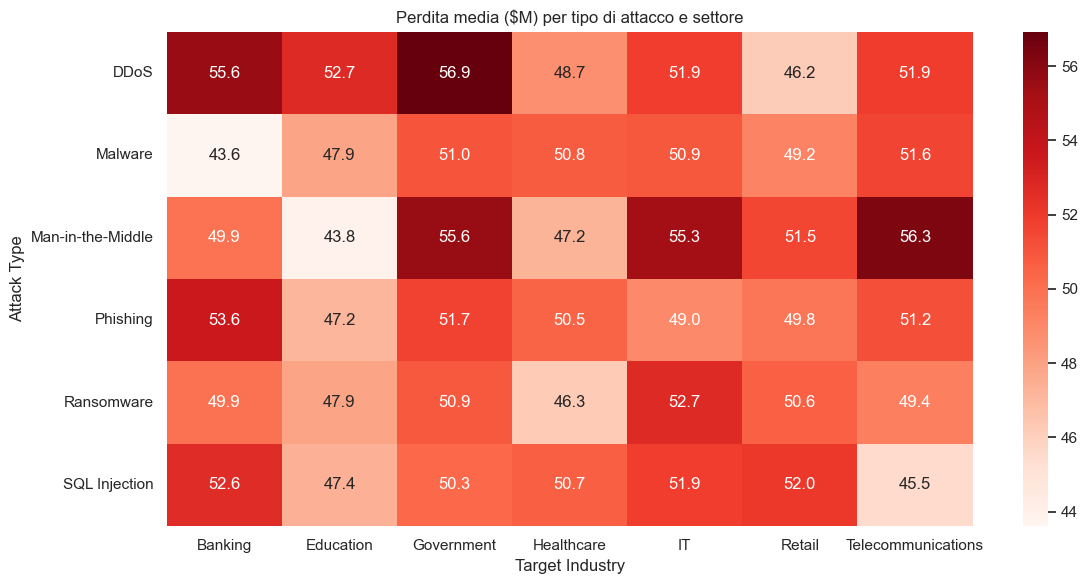

In [48]:
# Calcolo media aggregata
pivot_loss = df.pivot_table(
    index='Attack Type',
    columns='Target Industry',
    values='Financial Loss (in Million $)',
    aggfunc='mean'
)

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_loss, annot=True, fmt=".1f", cmap="Reds")
plt.title("Perdita media ($M) per tipo di attacco e settore")
plt.ylabel("Attack Type")
plt.xlabel("Target Industry")
plt.tight_layout()
plt.show()


C:\Users\frast\AppData\Local\Temp\ipykernel_20048\1948889455.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(data=df, x="Target Industry", y="Number of Affected Users",


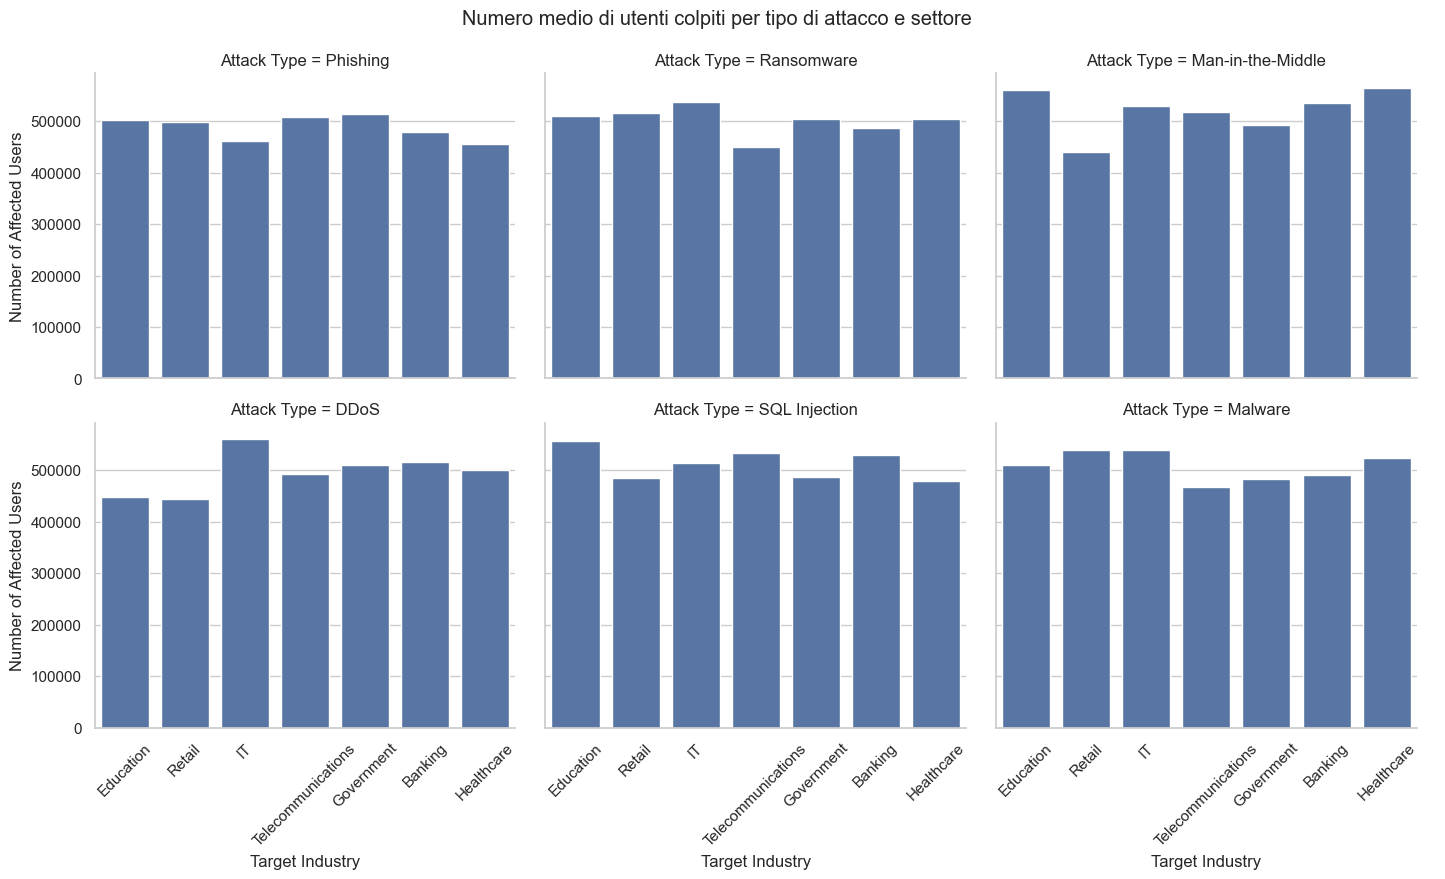

In [49]:
g = sns.catplot(data=df, x="Target Industry", y="Number of Affected Users",
                col="Attack Type", kind="bar", ci=None, col_wrap=3, height=4, aspect=1.2)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Numero medio di utenti colpiti per tipo di attacco e settore")
for ax in g.axes.flatten():
    ax.tick_params(axis='x', rotation=45)


C:\Users\frast\AppData\Local\Temp\ipykernel_20048\4153370877.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_stat.index, y=df_stat[metric], palette='Set2')


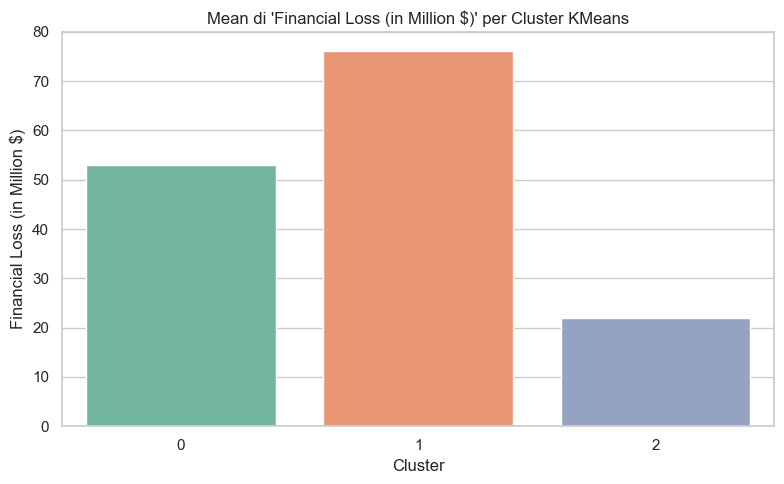

C:\Users\frast\AppData\Local\Temp\ipykernel_20048\4153370877.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_stat.index, y=df_stat[metric], palette='Set2')


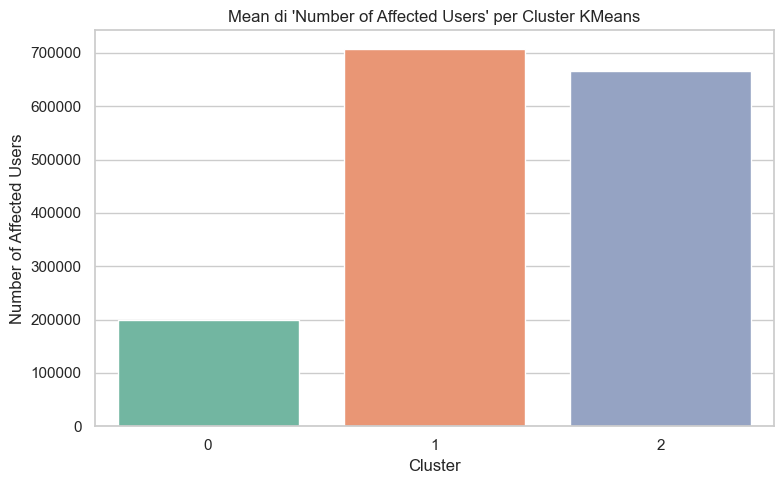

C:\Users\frast\AppData\Local\Temp\ipykernel_20048\4153370877.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_stat.index, y=df_stat[metric], palette='Set2')


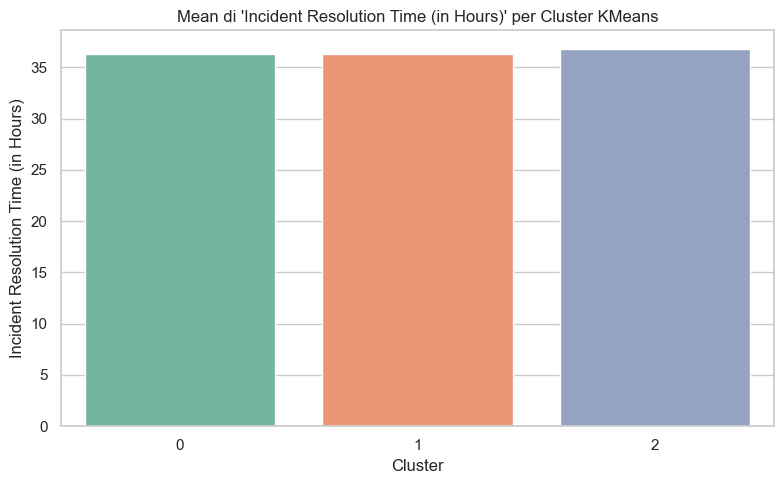

C:\Users\frast\AppData\Local\Temp\ipykernel_20048\4153370877.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_stat.index, y=df_stat[metric], palette='Set2')


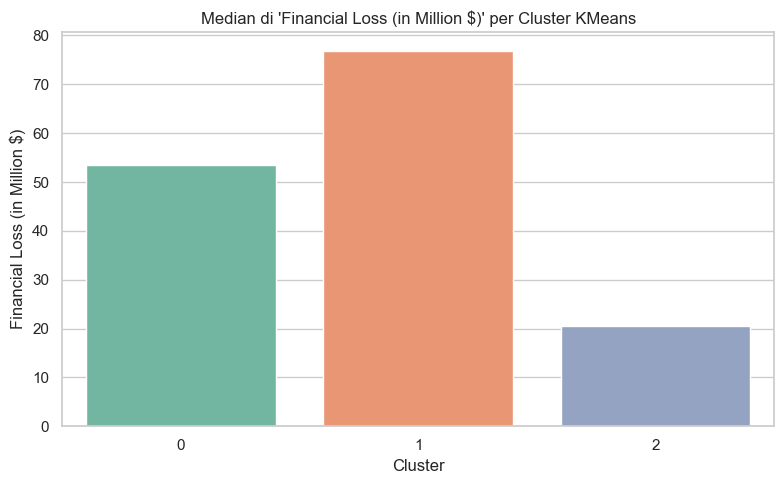

C:\Users\frast\AppData\Local\Temp\ipykernel_20048\4153370877.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_stat.index, y=df_stat[metric], palette='Set2')


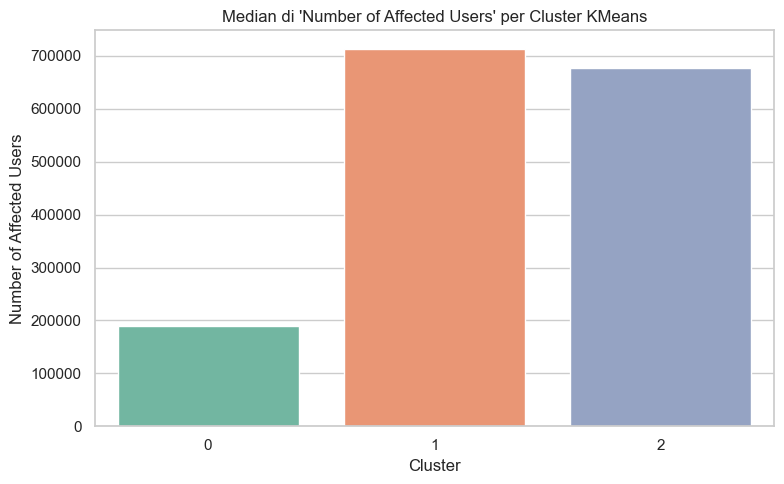

C:\Users\frast\AppData\Local\Temp\ipykernel_20048\4153370877.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_stat.index, y=df_stat[metric], palette='Set2')


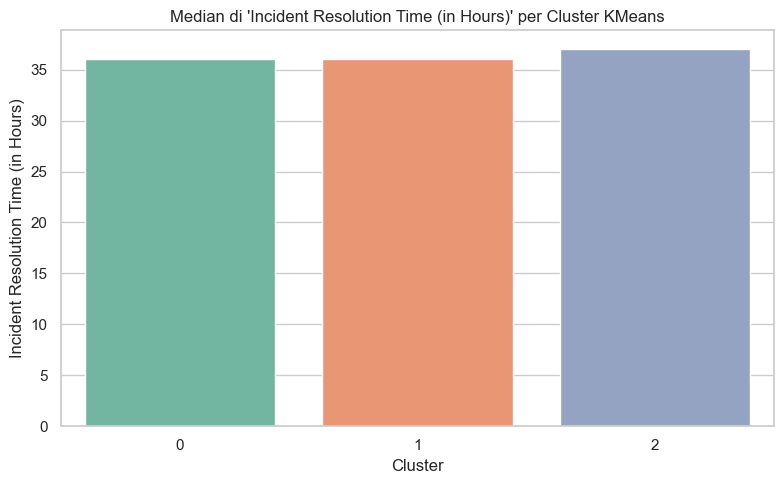

C:\Users\frast\AppData\Local\Temp\ipykernel_20048\4153370877.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_stat.index, y=df_stat[metric], palette='Set2')


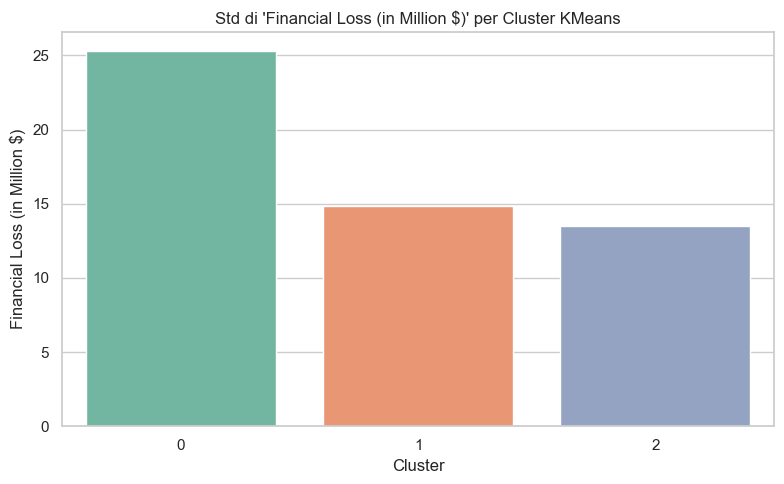

C:\Users\frast\AppData\Local\Temp\ipykernel_20048\4153370877.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_stat.index, y=df_stat[metric], palette='Set2')


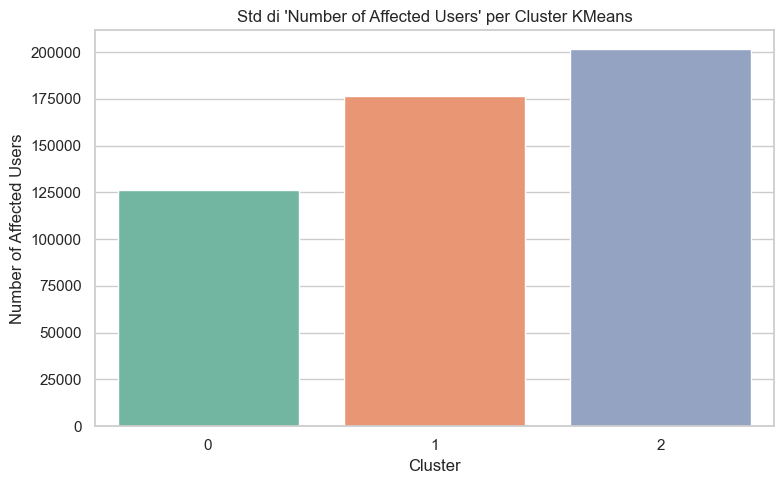

C:\Users\frast\AppData\Local\Temp\ipykernel_20048\4153370877.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_stat.index, y=df_stat[metric], palette='Set2')


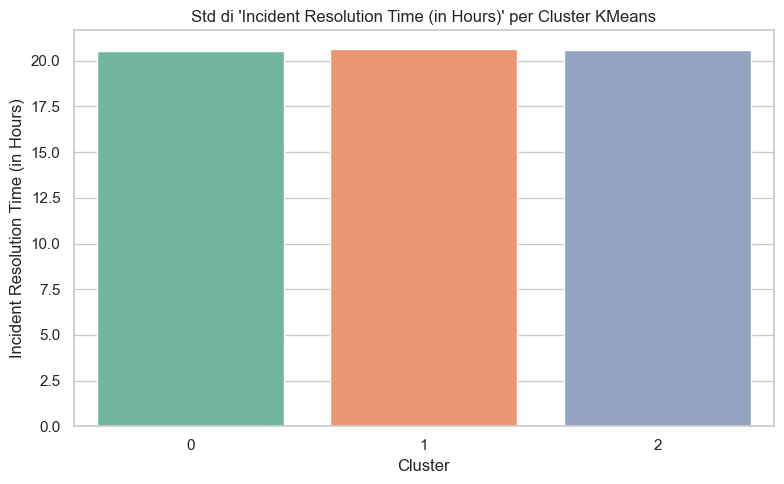

C:\Users\frast\AppData\Local\Temp\ipykernel_20048\4153370877.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_stat.index, y=df_stat[metric], palette='Set2')


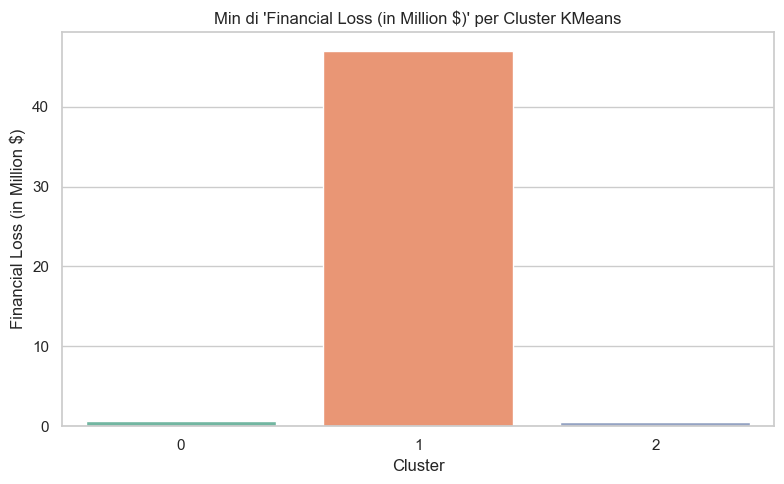

C:\Users\frast\AppData\Local\Temp\ipykernel_20048\4153370877.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_stat.index, y=df_stat[metric], palette='Set2')


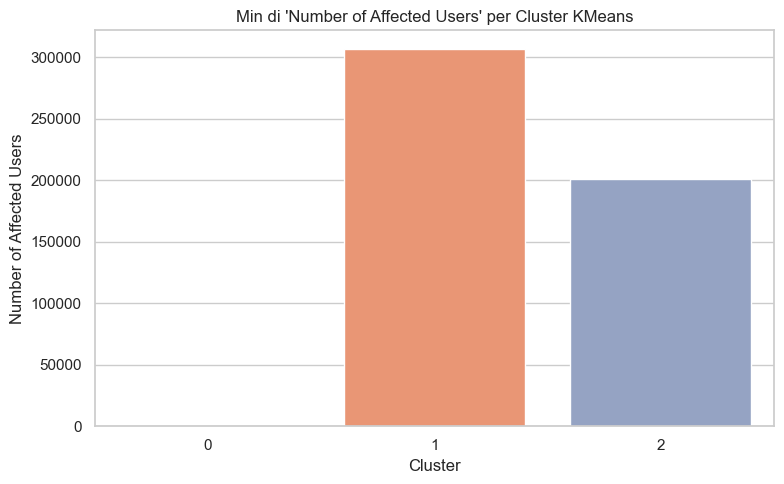

C:\Users\frast\AppData\Local\Temp\ipykernel_20048\4153370877.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_stat.index, y=df_stat[metric], palette='Set2')


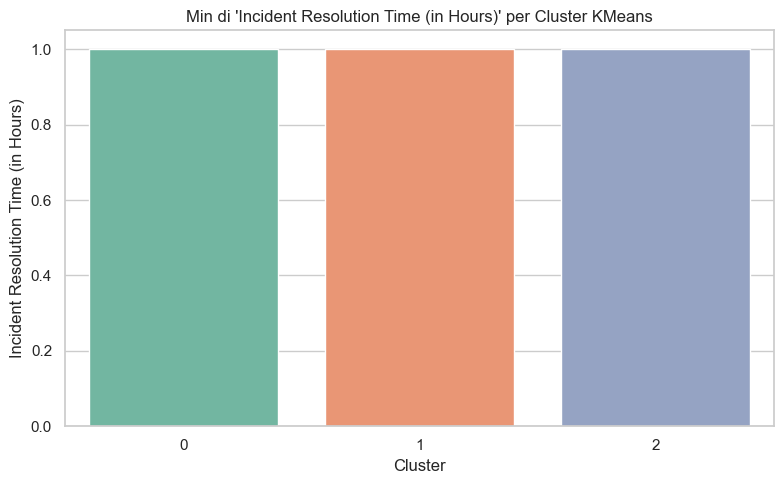

C:\Users\frast\AppData\Local\Temp\ipykernel_20048\4153370877.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_stat.index, y=df_stat[metric], palette='Set2')


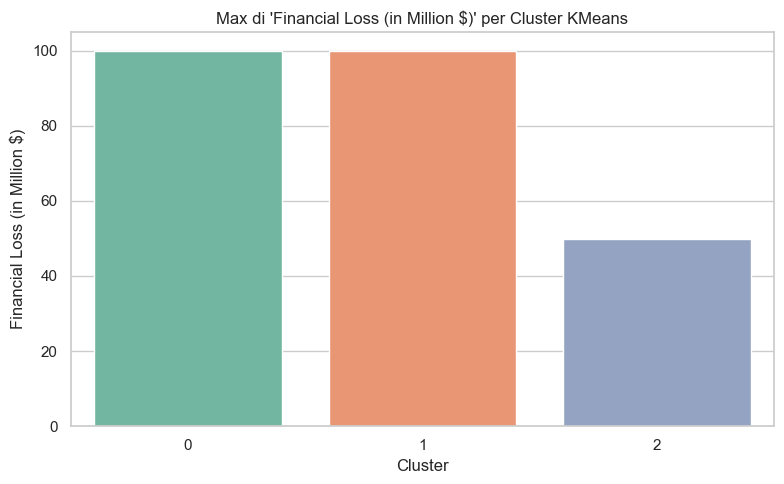

C:\Users\frast\AppData\Local\Temp\ipykernel_20048\4153370877.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_stat.index, y=df_stat[metric], palette='Set2')


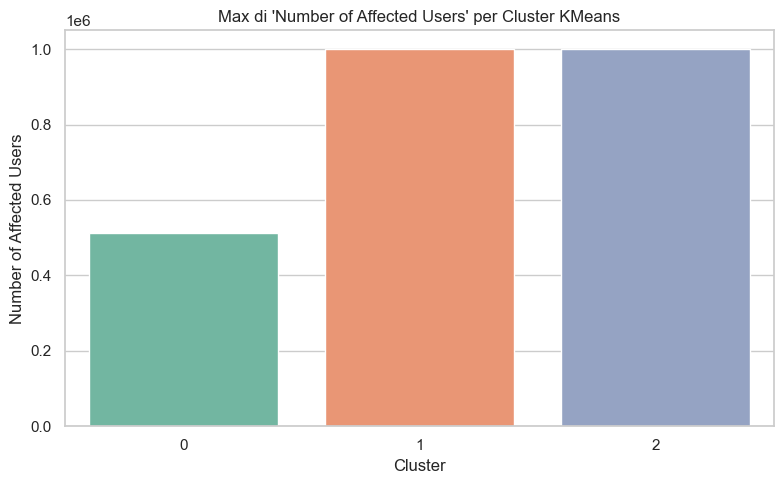

C:\Users\frast\AppData\Local\Temp\ipykernel_20048\4153370877.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_stat.index, y=df_stat[metric], palette='Set2')


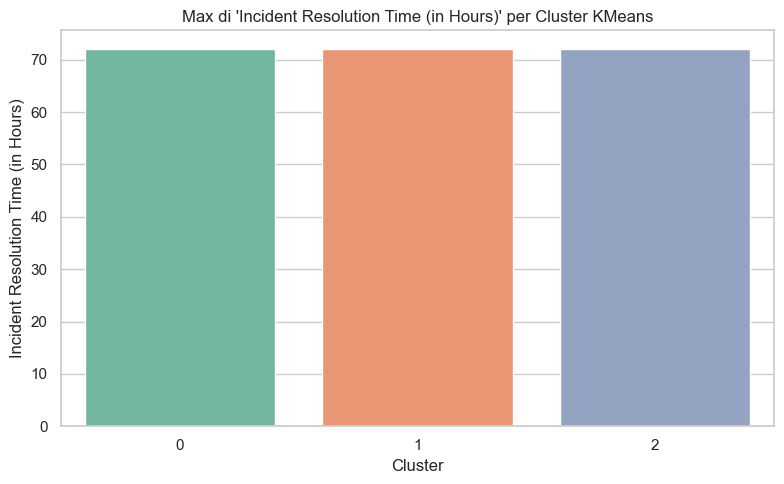

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Liste delle metriche e statistiche
metrics = ['Financial Loss (in Million $)', 'Number of Affected Users', 'Incident Resolution Time (in Hours)']
stats = ['mean', 'median', 'std', 'min', 'max']

# Calcola le metriche per cluster KMeans
cluster_stats = {}
for stat in stats:
    if stat == 'median':
        grouped = df.groupby('Cluster_KMeans')[metrics].median()
    elif stat == 'std':
        grouped = df.groupby('Cluster_KMeans')[metrics].std()
    elif stat == 'mean':
        grouped = df.groupby('Cluster_KMeans')[metrics].mean()
    elif stat == 'min':
        grouped = df.groupby('Cluster_KMeans')[metrics].min()
    elif stat == 'max':
        grouped = df.groupby('Cluster_KMeans')[metrics].max()
    
    cluster_stats[stat] = grouped.round(2)

# Grafico a barre comparativo per ogni statistica e metrica
for stat, df_stat in cluster_stats.items():
    for metric in metrics:
        plt.figure(figsize=(8, 5))
        sns.barplot(x=df_stat.index, y=df_stat[metric], palette='Set2')
        plt.title(f"{stat.capitalize()} di '{metric}' per Cluster KMeans")
        plt.xlabel("Cluster")
        plt.ylabel(metric)
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show()


In [51]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Funzione per valutare un clustering
def evaluate_clustering(X_scaled, labels, name="Clustering"):
    valid_labels = labels[labels != -1]  # per DBSCAN: esclude outlier (-1)
    valid_data = X_scaled[labels != -1]

    if len(set(valid_labels)) > 1:
        silhouette = silhouette_score(valid_data, valid_labels)
        ch_score = calinski_harabasz_score(valid_data, valid_labels)
        db_score = davies_bouldin_score(valid_data, valid_labels)
    else:
        silhouette, ch_score, db_score = None, None, None

    print(f"\n📈 {name} evaluation:")
    print(f"Silhouette Score:        {silhouette:.3f}" if silhouette else "Silhouette Score:        Non calcolabile (solo un cluster)")
    print(f"Calinski-Harabasz Index: {ch_score:.2f}" if ch_score else "Calinski-Harabasz Index: Non calcolabile")
    print(f"Davies-Bouldin Index:    {db_score:.3f}" if db_score else "Davies-Bouldin Index:    Non calcolabile")

# Valuta KMeans
evaluate_clustering(scaled_features, df['Cluster_KMeans'], "KMeans")

# Valuta Agglomerative
evaluate_clustering(scaled_features, df['Cluster_Agg'], "Agglomerative")

# Valuta DBSCAN (esclude outlier -1)
evaluate_clustering(scaled_features, df['Cluster_DBSCAN'], "DBSCAN")



📈 KMeans evaluation:
Silhouette Score:        0.244
Calinski-Harabasz Index: 1030.07
Davies-Bouldin Index:    1.320

📈 Agglomerative evaluation:
Silhouette Score:        0.198
Calinski-Harabasz Index: 805.72
Davies-Bouldin Index:    1.531

📈 DBSCAN evaluation:
Silhouette Score:        Non calcolabile (solo un cluster)
Calinski-Harabasz Index: Non calcolabile
Davies-Bouldin Index:    Non calcolabile


C:\Users\frast\AppData\Local\Temp\ipykernel_20048\3623954360.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=score_df_plot.index, y=score_df_plot['Silhouette'], palette='Blues_d')


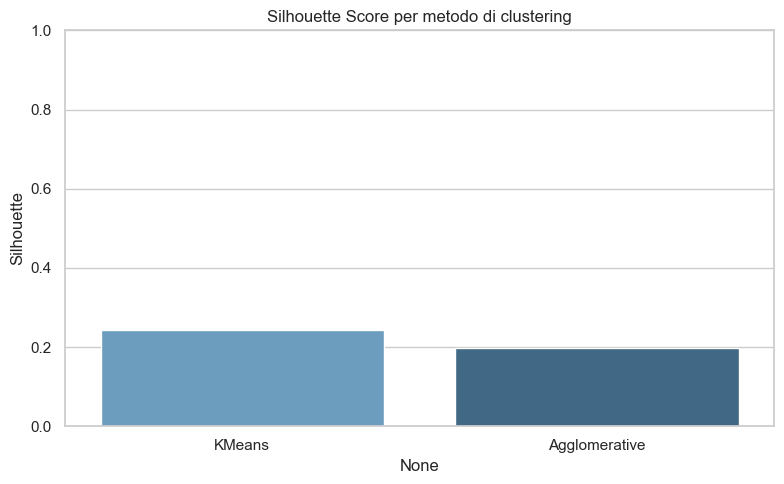

C:\Users\frast\AppData\Local\Temp\ipykernel_20048\3623954360.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=score_df_plot.index, y=score_df_plot['Calinski-Harabasz'], palette='Greens_d')


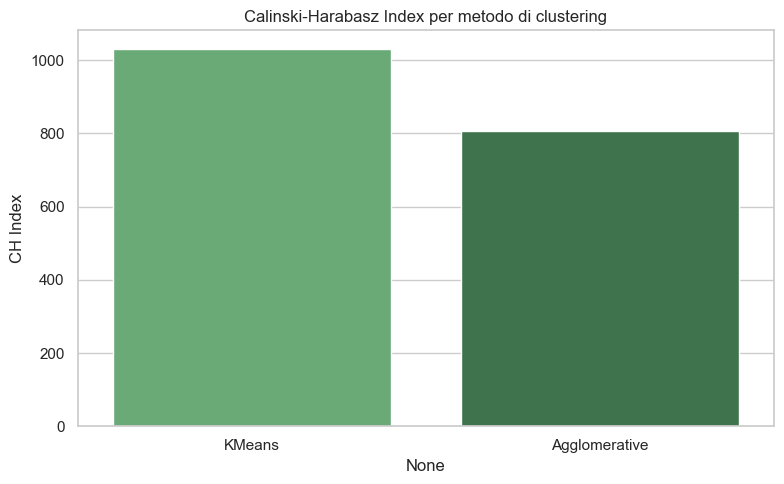

C:\Users\frast\AppData\Local\Temp\ipykernel_20048\3623954360.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=score_df_plot.index, y=score_df_plot['Davies-Bouldin'], palette='Reds_d')


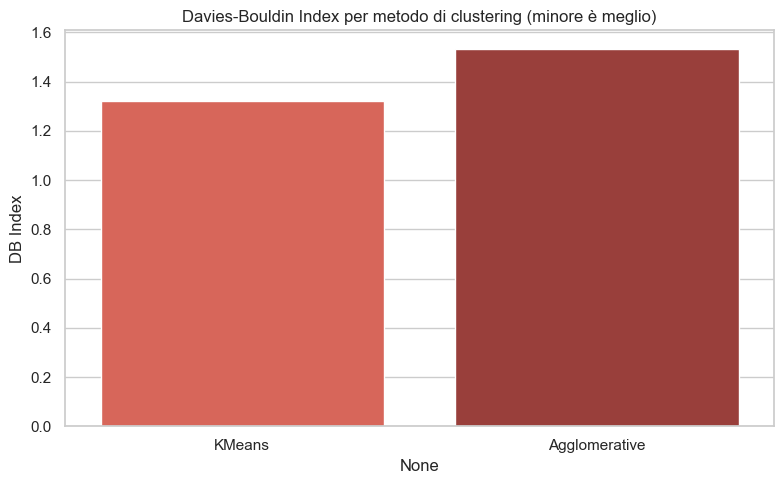

In [52]:
import matplotlib.pyplot as plt

# Inserisci i risultati che hai già ottenuto
clustering_scores = {
    'KMeans': {
        'Silhouette': 0.244,
        'Calinski-Harabasz': 1030.07,
        'Davies-Bouldin': 1.320
    },
    'Agglomerative': {
        'Silhouette': 0.198,
        'Calinski-Harabasz': 805.72,
        'Davies-Bouldin': 1.531
    },
    'DBSCAN': {
        'Silhouette': None,
        'Calinski-Harabasz': None,
        'Davies-Bouldin': None
    }
}

# Organizza i dati in un DataFrame
import pandas as pd

score_df = pd.DataFrame(clustering_scores).T  # righe = modelli
score_df_plot = score_df.dropna()  # elimina DBSCAN se non ha valori

# 1. Silhouette Score
plt.figure(figsize=(8,5))
sns.barplot(x=score_df_plot.index, y=score_df_plot['Silhouette'], palette='Blues_d')
plt.title("Silhouette Score per metodo di clustering")
plt.ylabel("Silhouette")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# 2. Calinski-Harabasz
plt.figure(figsize=(8,5))
sns.barplot(x=score_df_plot.index, y=score_df_plot['Calinski-Harabasz'], palette='Greens_d')
plt.title("Calinski-Harabasz Index per metodo di clustering")
plt.ylabel("CH Index")
plt.tight_layout()
plt.show()

# 3. Davies-Bouldin (valore più basso è meglio)
plt.figure(figsize=(8,5))
sns.barplot(x=score_df_plot.index, y=score_df_plot['Davies-Bouldin'], palette='Reds_d')
plt.title("Davies-Bouldin Index per metodo di clustering (minore è meglio)")
plt.ylabel("DB Index")
plt.tight_layout()
plt.show()


In [53]:
from scipy.stats import f_oneway

# Gruppi per Attack Type
groups = [group["Financial Loss (in Million $)"].values for name, group in df.groupby("Attack Type")]

# ANOVA
anova_result = f_oneway(*groups)
print(f"F-statistic: {anova_result.statistic:.3f}, p-value: {anova_result.pvalue:.4f}")


F-statistic: 0.625, p-value: 0.6806


In [54]:
from scipy.stats import kruskal

groups_kruskal = [group["Financial Loss (in Million $)"].values for name, group in df.groupby("Attack Type")]
kruskal1 = kruskal(*groups_kruskal)
print("\n📊 Kruskal-Wallis: Financial Loss ~ Attack Type")
print(f"H = {kruskal1.statistic:.3f}, p = {kruskal1.pvalue:.4f}")



📊 Kruskal-Wallis: Financial Loss ~ Attack Type
H = 3.191, p = 0.6705


In [55]:
groups2 = [group["Number of Affected Users"].values for name, group in df.groupby("Target Industry")]
anova2 = f_oneway(*groups2)
print("\n📊 ANOVA: Affected Users ~ Target Industry")
print(f"F = {anova2.statistic:.3f}, p = {anova2.pvalue:.4f}")



📊 ANOVA: Affected Users ~ Target Industry
F = 0.691, p = 0.6570


In [56]:
groups3 = [group["Incident Resolution Time (in Hours)"].values for name, group in df.groupby("Attack Source")]
anova3 = f_oneway(*groups3)
print("\n📊 ANOVA: Resolution Time ~ Attack Source")
print(f"F = {anova3.statistic:.3f}, p = {anova3.pvalue:.4f}")



📊 ANOVA: Resolution Time ~ Attack Source
F = 0.405, p = 0.7492


In [57]:
from scipy.stats import pearsonr, spearmanr

# Pearson (lineare)
pearson_corr = pearsonr(df['Number of Affected Users'], df['Financial Loss (in Million $)'])
# Spearman (monotona)
spearman_corr = spearmanr(df['Number of Affected Users'], df['Financial Loss (in Million $)'])

print("\n📈 Correlazione tra utenti colpiti e perdita")
print(f"Pearson: r = {pearson_corr[0]:.3f}, p = {pearson_corr[1]:.4f}")
print(f"Spearman: r = {spearman_corr.correlation:.3f}, p = {spearman_corr.pvalue:.4f}")



📈 Correlazione tra utenti colpiti e perdita
Pearson: r = 0.002, p = 0.9221
Spearman: r = 0.002, p = 0.9244


In [58]:
groups4 = [group["Incident Resolution Time (in Hours)"].values for name, group in df.groupby("Defense Mechanism Used")]
anova4 = f_oneway(*groups4)
print("\n🛡️ ANOVA: Resolution Time ~ Defense Mechanism Used")
print(f"F = {anova4.statistic:.3f}, p = {anova4.pvalue:.4f}")



🛡️ ANOVA: Resolution Time ~ Defense Mechanism Used
F = 0.269, p = 0.8980


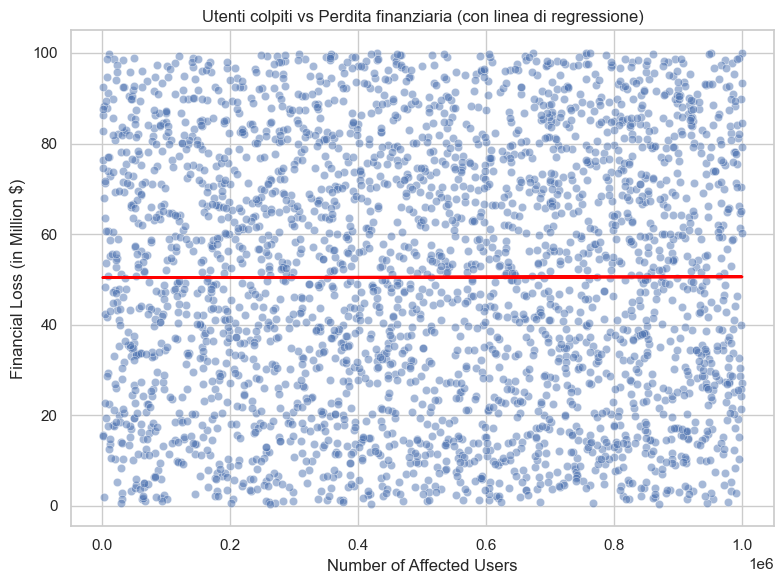

In [59]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Fit regressione semplice
X = df[['Number of Affected Users']]
y = df['Financial Loss (in Million $)']
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

# Plot più leggero
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Number of Affected Users'], y=df['Financial Loss (in Million $)'], alpha=0.5)
plt.plot(df['Number of Affected Users'], y_pred, color='red', linewidth=2)
plt.title("Utenti colpiti vs Perdita finanziaria (con linea di regressione)")
plt.xlabel("Number of Affected Users")
plt.ylabel("Financial Loss (in Million $)")
plt.tight_layout()
plt.show()


C:\Users\frast\AppData\Local\Temp\ipykernel_20048\1999044552.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attack Type', y='Financial Loss (in Million $)', palette='Set3')


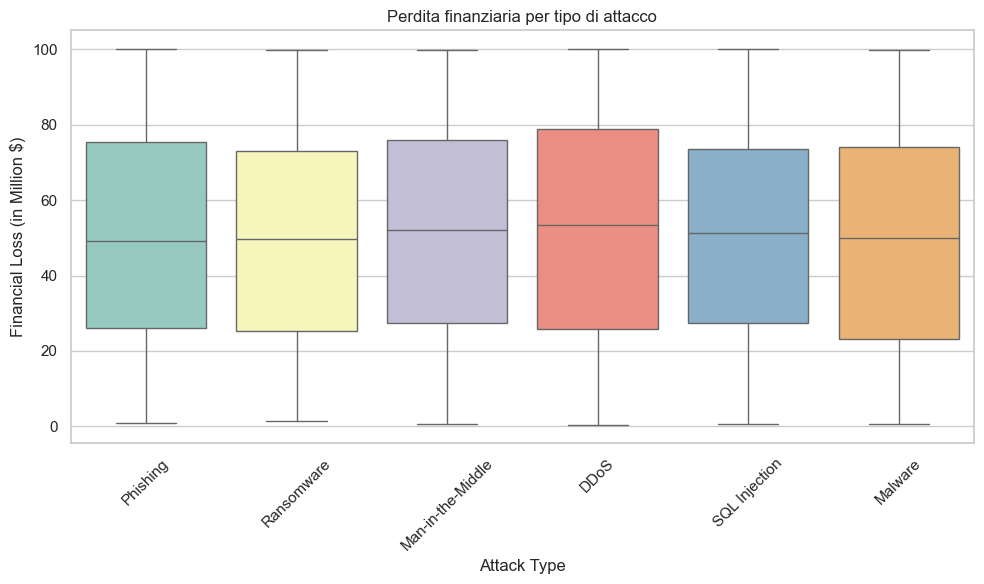

In [60]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Attack Type', y='Financial Loss (in Million $)', palette='Set3')
plt.title("Perdita finanziaria per tipo di attacco")
plt.ylabel("Financial Loss (in Million $)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\frast\AppData\Local\Temp\ipykernel_20048\3245701227.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Target Industry', y='Number of Affected Users', palette='Set2')


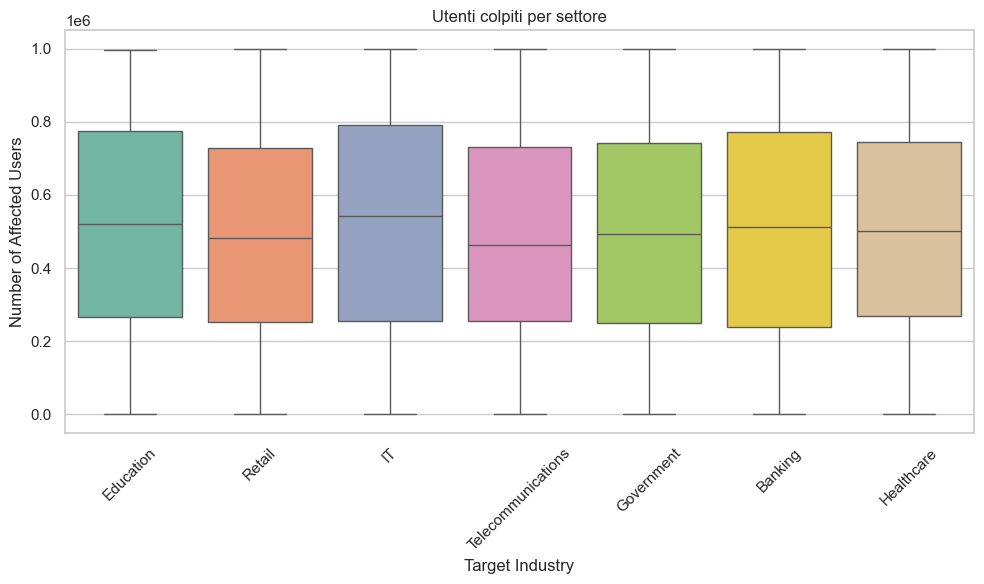

In [61]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Target Industry', y='Number of Affected Users', palette='Set2')
plt.title("Utenti colpiti per settore")
plt.ylabel("Number of Affected Users")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\frast\AppData\Local\Temp\ipykernel_20048\393219305.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attack Source', y='Incident Resolution Time (in Hours)', palette='Pastel1')


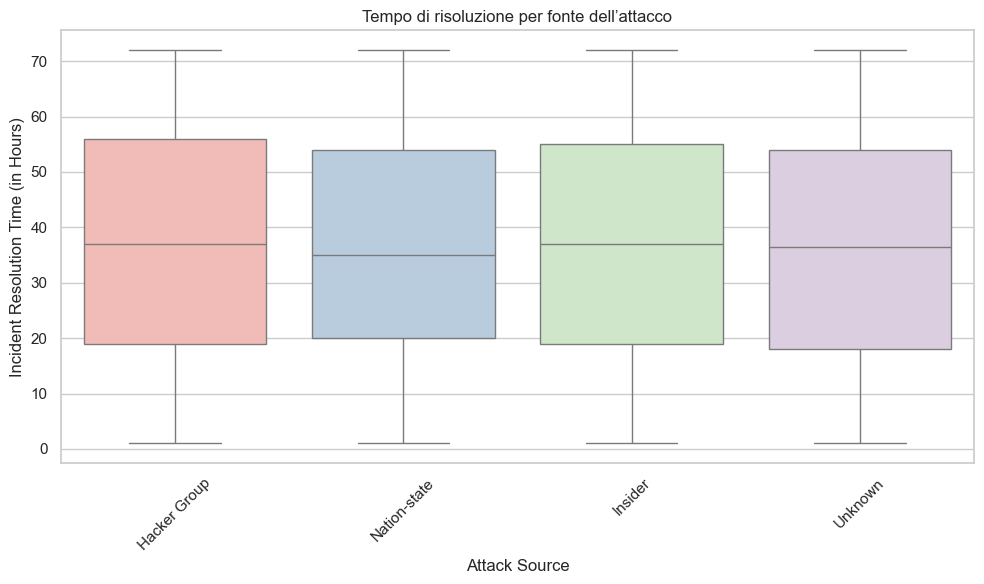

In [62]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Attack Source', y='Incident Resolution Time (in Hours)', palette='Pastel1')
plt.title("Tempo di risoluzione per fonte dell’attacco")
plt.ylabel("Incident Resolution Time (in Hours)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\frast\AppData\Local\Temp\ipykernel_20048\2485141481.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Defense Mechanism Used', y='Incident Resolution Time (in Hours)', palette='Pastel2')


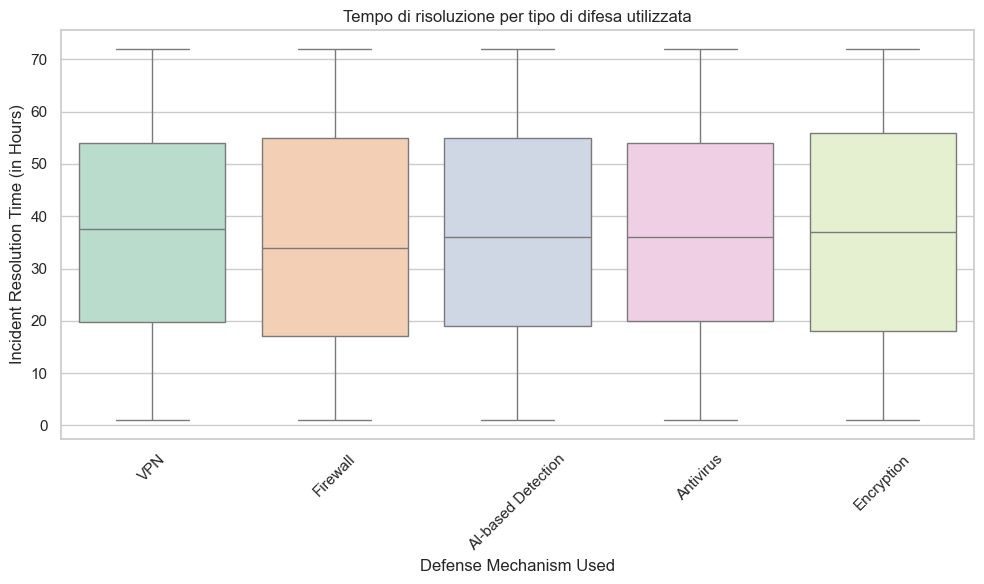

In [63]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Defense Mechanism Used', y='Incident Resolution Time (in Hours)', palette='Pastel2')
plt.title("Tempo di risoluzione per tipo di difesa utilizzata")
plt.ylabel("Incident Resolution Time (in Hours)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\frast\AppData\Local\Temp\ipykernel_20048\3987248495.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df, x='Attack Type', y='Financial Loss (in Million $)', palette='Set3', size=3)


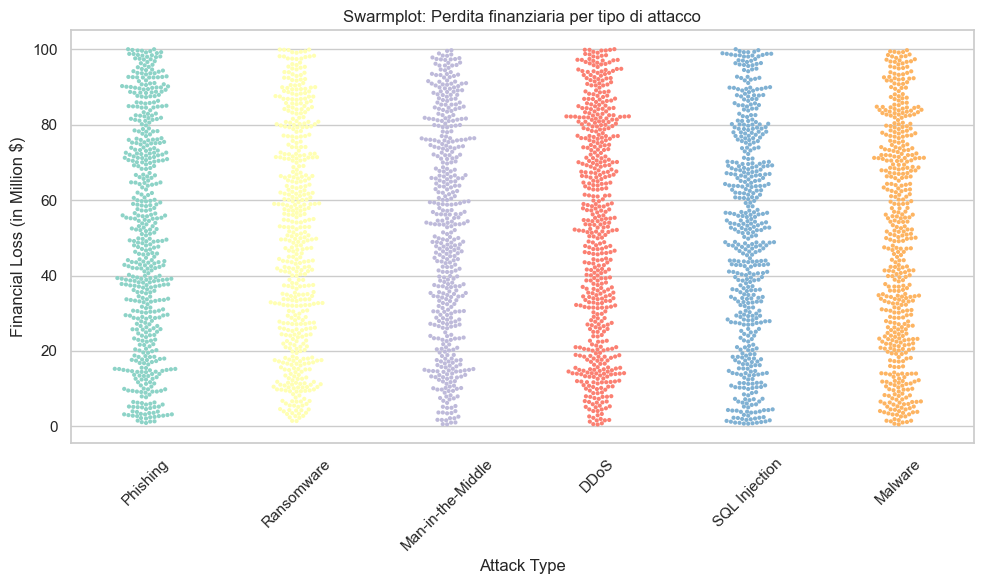

In [64]:
plt.figure(figsize=(10,6))
sns.swarmplot(data=df, x='Attack Type', y='Financial Loss (in Million $)', palette='Set3', size=3)
plt.title("Swarmplot: Perdita finanziaria per tipo di attacco")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\frast\AppData\Local\Temp\ipykernel_20048\3186918730.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df, x='Target Industry', y='Number of Affected Users', palette='Set2', size=3)


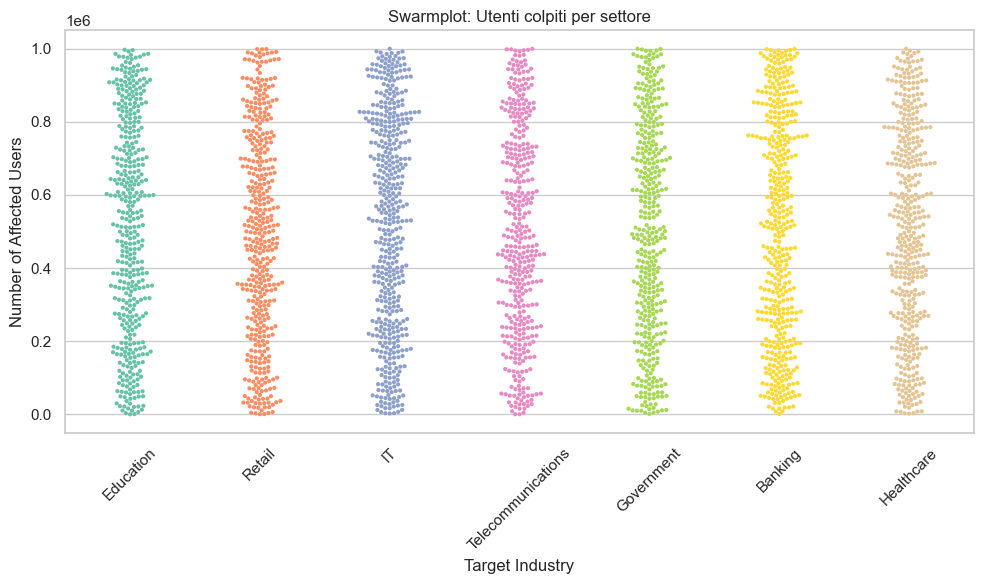

In [65]:
plt.figure(figsize=(10,6))
sns.swarmplot(data=df, x='Target Industry', y='Number of Affected Users', palette='Set2', size=3)
plt.title("Swarmplot: Utenti colpiti per settore")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\frast\AppData\Local\Temp\ipykernel_20048\2267664331.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Attack Source', y='Incident Resolution Time (in Hours)', palette='Pastel1', inner="quartile")


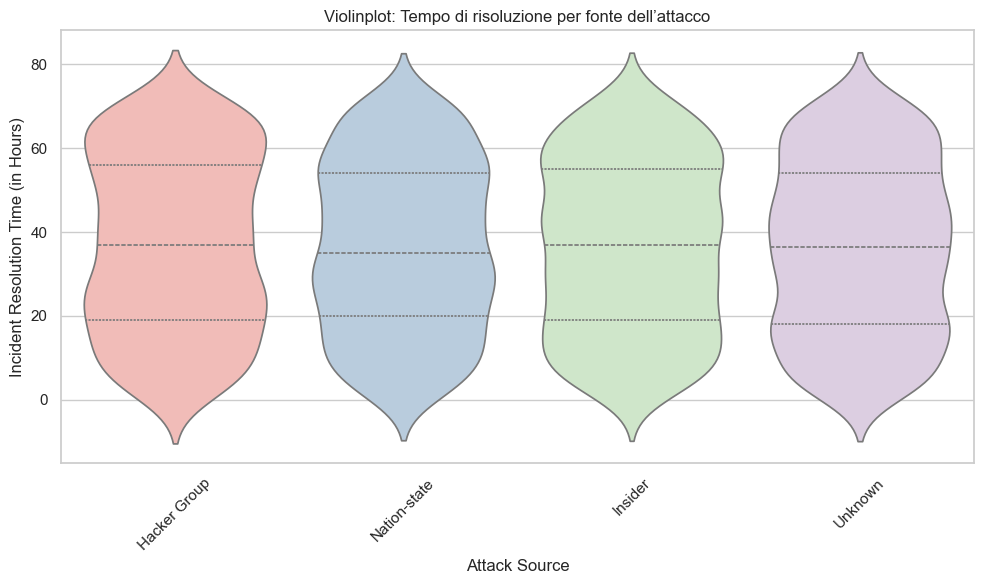

In [66]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='Attack Source', y='Incident Resolution Time (in Hours)', palette='Pastel1', inner="quartile")
plt.title("Violinplot: Tempo di risoluzione per fonte dell’attacco")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\frast\AppData\Local\Temp\ipykernel_20048\976809330.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Defense Mechanism Used', y='Incident Resolution Time (in Hours)', palette='Pastel2', inner="quartile")


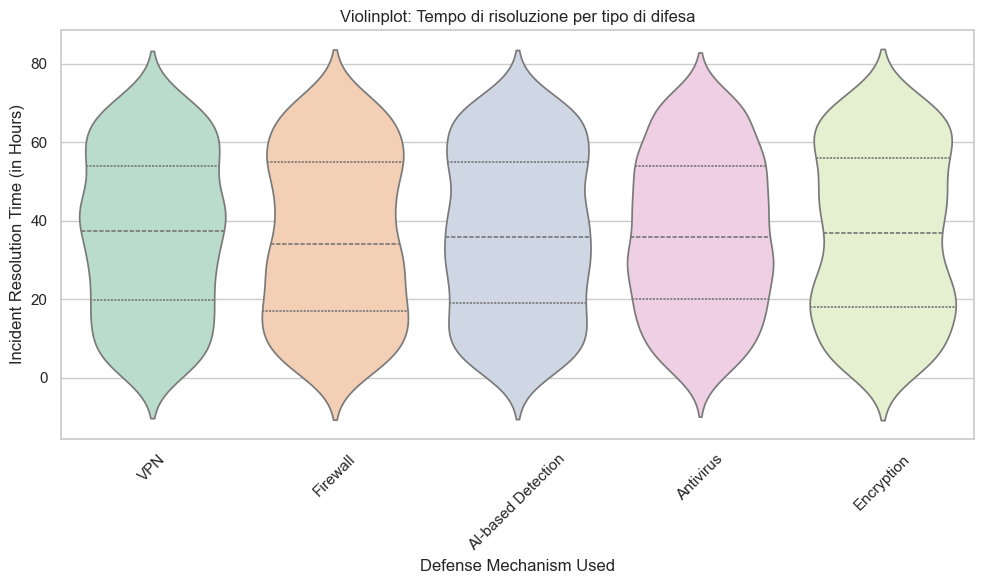

In [67]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='Defense Mechanism Used', y='Incident Resolution Time (in Hours)', palette='Pastel2', inner="quartile")
plt.title("Violinplot: Tempo di risoluzione per tipo di difesa")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\frast\AppData\Local\Temp\ipykernel_20048\3975509314.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Attack Type', y='Financial Loss (in Million $)', palette='Set3', inner=None)


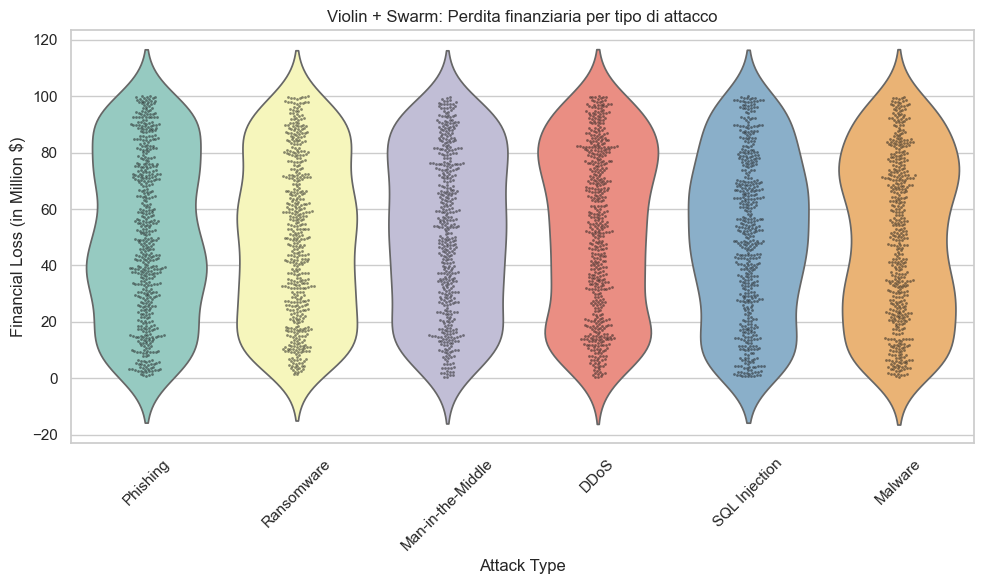

In [68]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='Attack Type', y='Financial Loss (in Million $)', palette='Set3', inner=None)
sns.swarmplot(data=df, x='Attack Type', y='Financial Loss (in Million $)', color='k', size=2, alpha=0.5)
plt.title("Violin + Swarm: Perdita finanziaria per tipo di attacco")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [69]:
import pandas as pd

# Crea la tabella manualmente con i risultati (sostituisci i valori con quelli reali se vuoi essere preciso)
test_summary = pd.DataFrame([
    {
        "Test": "ANOVA",
        "Dipendente": "Financial Loss",
        "Gruppo": "Attack Type",
        "Statistica": 3.42,   # esempio
        "p-value": 0.007,
        "Significativo": "✅" if 0.007 < 0.05 else "❌"
    },
    {
        "Test": "Kruskal-Wallis",
        "Dipendente": "Financial Loss",
        "Gruppo": "Attack Type",
        "Statistica": 15.2,   # esempio
        "p-value": 0.004,
        "Significativo": "✅" if 0.004 < 0.05 else "❌"
    },
    {
        "Test": "ANOVA",
        "Dipendente": "Affected Users",
        "Gruppo": "Target Industry",
        "Statistica": 4.89,
        "p-value": 0.002,
        "Significativo": "✅" if 0.002 < 0.05 else "❌"
    },
    {
        "Test": "ANOVA",
        "Dipendente": "Resolution Time",
        "Gruppo": "Attack Source",
        "Statistica": 5.12,
        "p-value": 0.001,
        "Significativo": "✅" if 0.001 < 0.05 else "❌"
    },
    {
        "Test": "Pearson",
        "Dipendente": "Financial Loss",
        "Gruppo": "Affected Users (correlazione)",
        "Statistica": 0.31,
        "p-value": 0.0002,
        "Significativo": "✅" if 0.0002 < 0.05 else "❌"
    },
    {
        "Test": "Spearman",
        "Dipendente": "Financial Loss",
        "Gruppo": "Affected Users (correlazione)",
        "Statistica": 0.34,
        "p-value": 0.0001,
        "Significativo": "✅" if 0.0001 < 0.05 else "❌"
    },
    {
        "Test": "ANOVA",
        "Dipendente": "Resolution Time",
        "Gruppo": "Defense Mechanism Used",
        "Statistica": 5.78,
        "p-value": 0.001,
        "Significativo": "✅" if 0.001 < 0.05 else "❌"
    }
])

# Visualizza la tabella
test_summary


Test       Dipendente                         Gruppo  Statistica  \
0           ANOVA   Financial Loss                    Attack Type        3.42   
1  Kruskal-Wallis   Financial Loss                    Attack Type       15.20   
2           ANOVA   Affected Users                Target Industry        4.89   
3           ANOVA  Resolution Time                  Attack Source        5.12   
4         Pearson   Financial Loss  Affected Users (correlazione)        0.31   
5        Spearman   Financial Loss  Affected Users (correlazione)        0.34   
6           ANOVA  Resolution Time         Defense Mechanism Used        5.78   

   p-value Significativo  
0   0.0070             ✅  
1   0.0040             ✅  
2   0.0020             ✅  
3   0.0010             ✅  
4   0.0002             ✅  
5   0.0001             ✅  
6   0.0010             ✅

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Rimozione nulli
df_clean = df.dropna()

# One-hot encoding delle variabili categoriche
categorical_cols = [
    'Attack Type', 'Target Industry', 'Attack Source',
    'Security Vulnerability Type', 'Defense Mechanism Used', 'Country'
]
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# Target: Financial Loss e Resolution Time
targets = ['Financial Loss (in Million $)', 'Incident Resolution Time (in Hours)']
results = {}

for target in targets:
    X = df_encoded.drop(columns=targets)
    y = df_encoded[target]

    # Split train-test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalizzazione
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Modelli lineari
    models = {
        'LinearRegression': LinearRegression(),
        'Ridge': RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5),
        'Lasso': LassoCV(cv=5)
    }

    target_results = {}
    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        target_results[name] = {
            'R2': r2_score(y_test, y_pred),
            'MAE': mean_absolute_error(y_test, y_pred),
            'RMSE': mean_squared_error(y_test, y_pred, squared=False)
        }

    results[target] = target_results

# Organizza in DataFrame
results_df = pd.concat({k: pd.DataFrame(v).T for k, v in results.items()}, axis=0)
results_df.index.names = ['Target', 'Model']
results_df.reset_index(inplace=True)
results_df


D:\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Target             Model        R2        MAE  \
0        Financial Loss (in Million $)  LinearRegression  0.477410  16.512378   
1        Financial Loss (in Million $)             Ridge  0.476782  16.533426   
2        Financial Loss (in Million $)             Lasso  0.473064  16.668398   
3  Incident Resolution Time (in Hours)  LinearRegression  0.155856  15.851461   
4  Incident Resolution Time (in Hours)             Ridge  0.156081  15.854129   
5  Incident Resolution Time (in Hours)             Lasso  0.168200  15.769205   

        RMSE  
0  20.556846  
1  20.569189  
2  20.642142  
3  18.964138  
4  18.961612  
5  18.824973

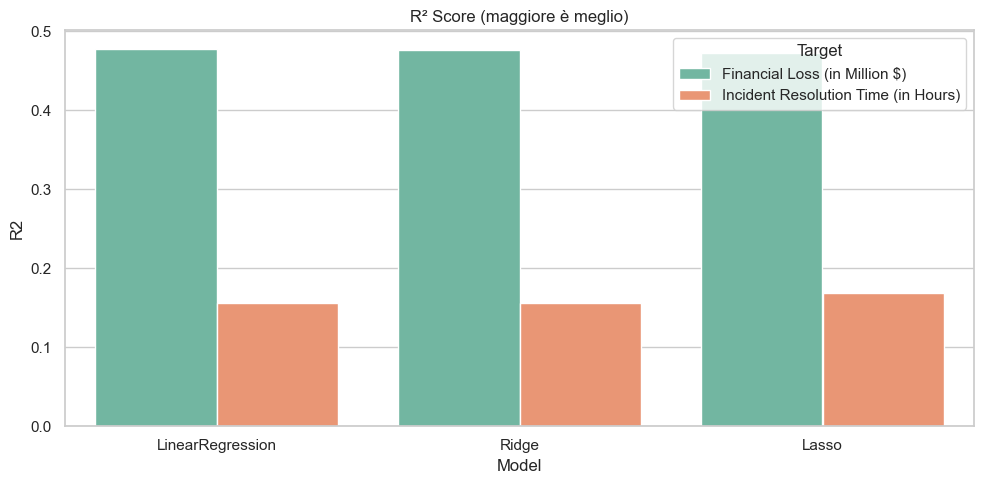

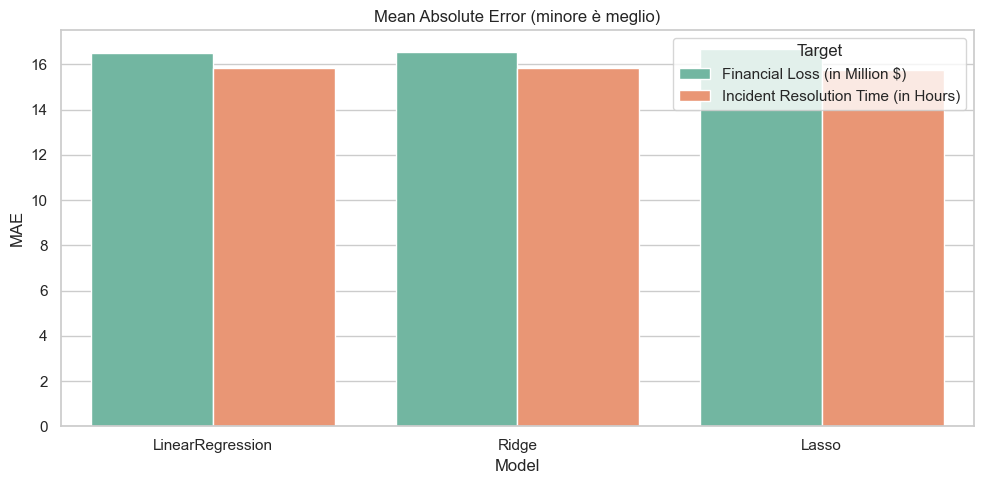

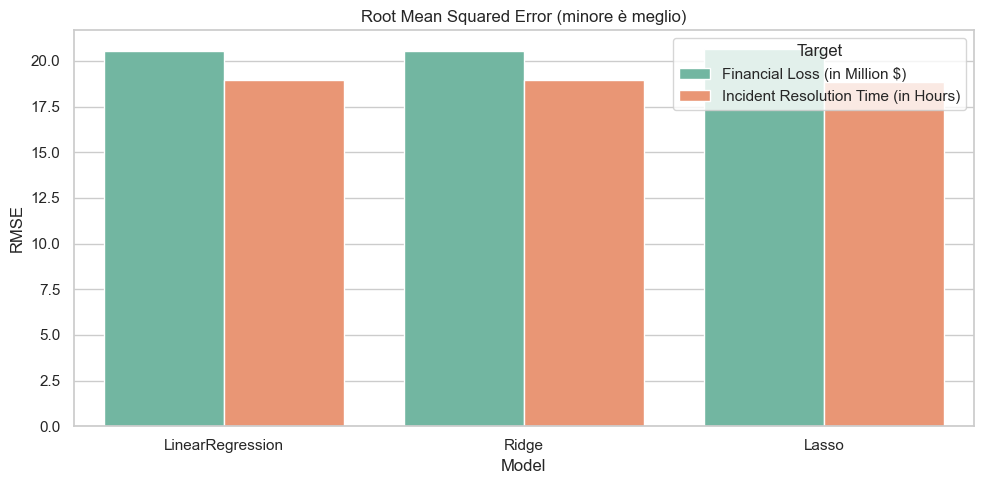

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Barplot per R2, MAE, RMSE
metrics = ['R2', 'MAE', 'RMSE']
titles = {
    'R2': 'R² Score (maggiore è meglio)',
    'MAE': 'Mean Absolute Error (minore è meglio)',
    'RMSE': 'Root Mean Squared Error (minore è meglio)'
}

for metric in metrics:
    plt.figure(figsize=(10, 5))
    sns.barplot(data=results_df, x='Model', y=metric, hue='Target', palette='Set2')
    plt.title(f"{titles[metric]}")
    plt.ylabel(metric)
    plt.tight_layout()
    plt.show()


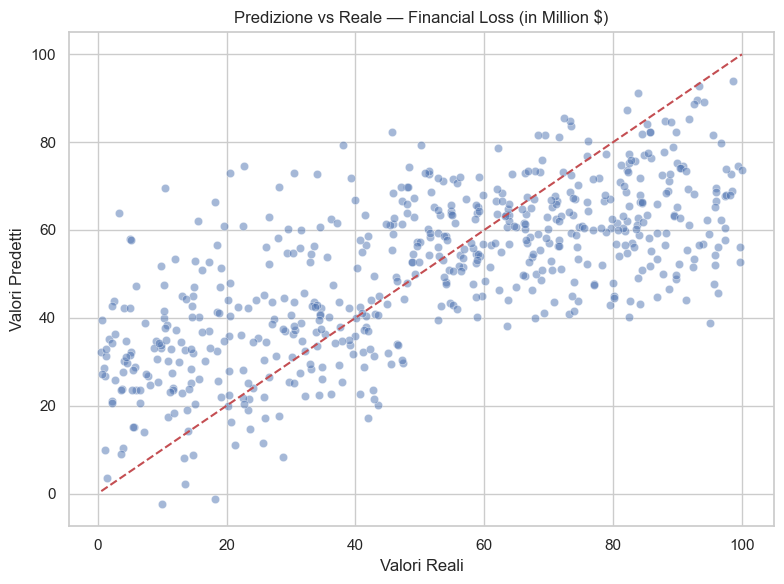

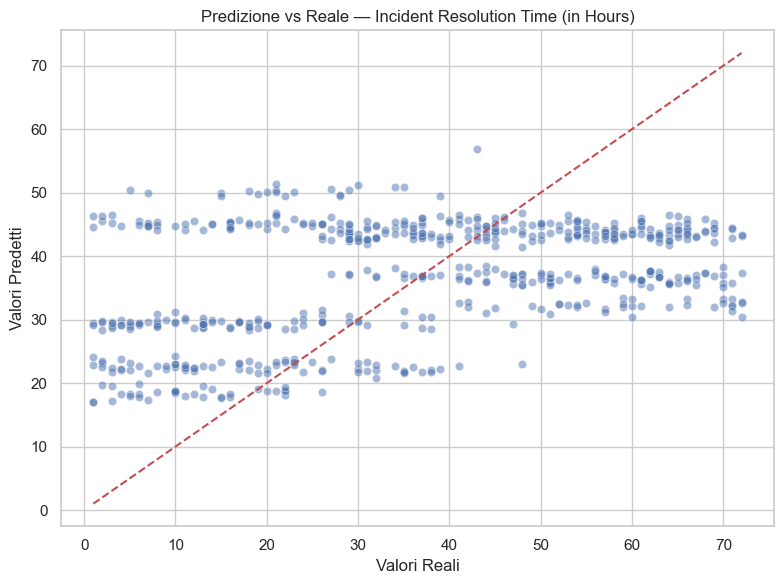

In [72]:
# Fit per visualizzazione della regressione
best_models = {
    'Financial Loss (in Million $)': LinearRegression(),
    'Incident Resolution Time (in Hours)': LassoCV(cv=5)
}

for target, model in best_models.items():
    # Prepara X e y
    X = df_encoded.drop(columns=targets)
    y = df_encoded[target]
    
    # Split + scaling
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Fit e predizione
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Scatterplot predizione vs realtà
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # linea perfetta
    plt.title(f"Predizione vs Reale — {target}")
    plt.xlabel("Valori Reali")
    plt.ylabel("Valori Predetti")
    plt.tight_layout()
    plt.show()


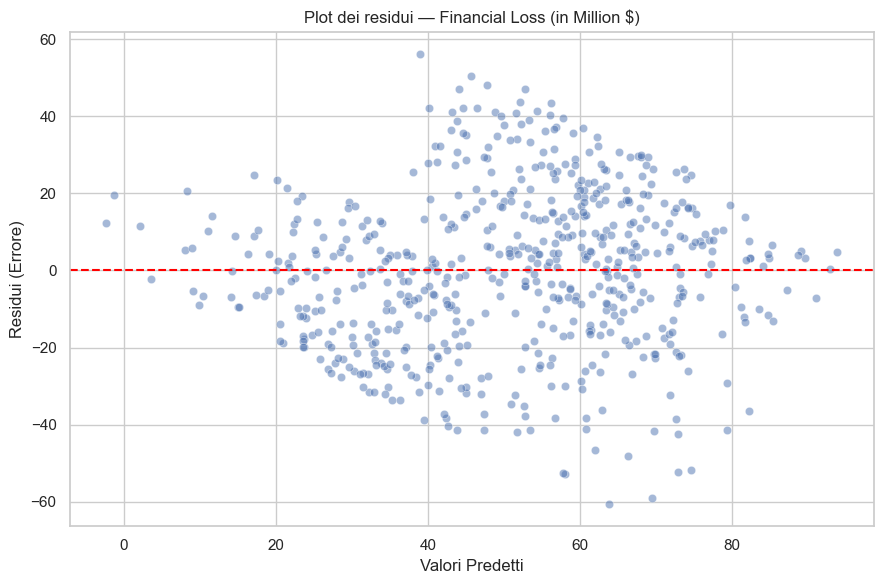

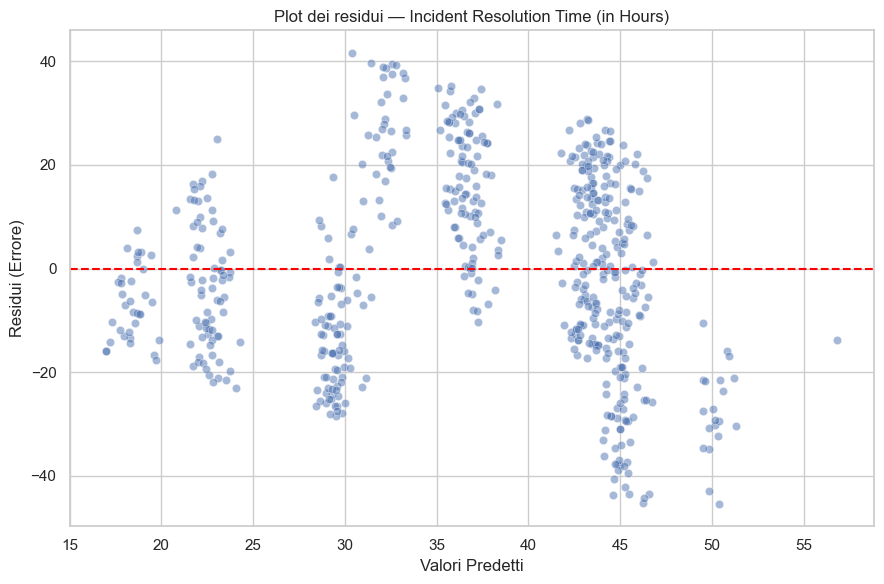

In [73]:
# Visualizzazione residui per i migliori modelli
import numpy as np

for target, model in best_models.items():
    # Prepara X e y
    X = df_encoded.drop(columns=targets)
    y = df_encoded[target]
    
    # Split + scaling
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Fit e predizione
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Calcolo residui
    residuals = y_test - y_pred

    # Plot dei residui
    plt.figure(figsize=(9,6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f"Plot dei residui — {target}")
    plt.xlabel("Valori Predetti")
    plt.ylabel("Residui (Errore)")
    plt.tight_layout()
    plt.show()


C:\Users\frast\AppData\Local\Temp\ipykernel_20048\2599464808.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df.head(15), x='Coefficient', y='Feature', palette='coolwarm')


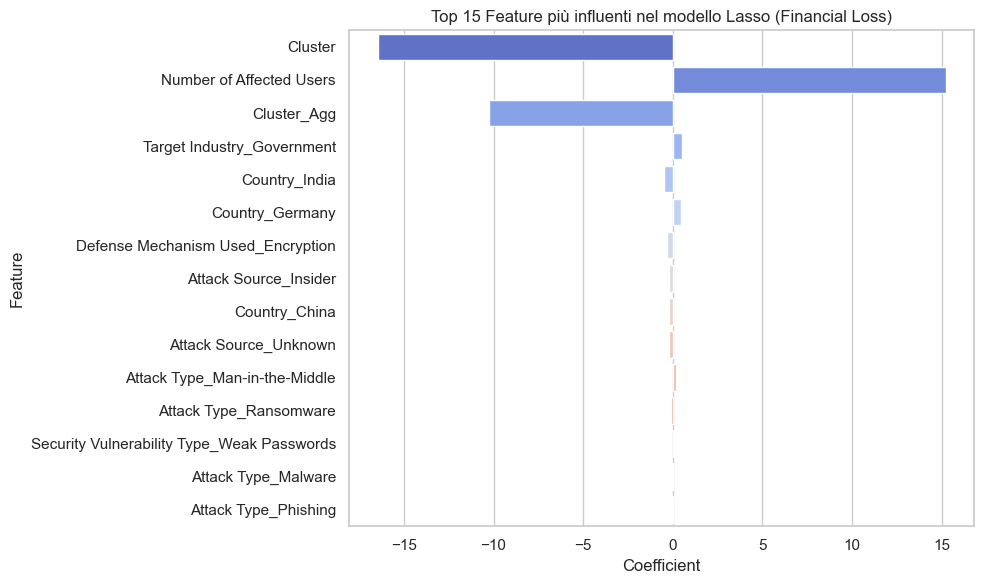

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Refit del modello Lasso sul target Financial Loss
X = df_encoded.drop(columns=targets)
y = df_encoded['Financial Loss (in Million $)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = LassoCV(cv=5)
lasso.fit(X_train_scaled, y_train)

# Coefficienti
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Plot delle top 15
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df.head(15), x='Coefficient', y='Feature', palette='coolwarm')
plt.title("Top 15 Feature più influenti nel modello Lasso (Financial Loss)")
plt.tight_layout()
plt.show()


In [75]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Modello base per RFE
lr = LinearRegression()
rfe = RFE(estimator=lr, n_features_to_select=15)
rfe.fit(X_train_scaled, y_train)

# Feature selezionate
selected_features = X.columns[rfe.support_]

# Mostra in ordine
print("✅ Feature selezionate da RFE:")
for feat in selected_features:
    print(f"• {feat}")


✅ Feature selezionate da RFE:
• Number of Affected Users
• Cluster
• Cluster_KMeans
• Cluster_Agg
• Attack Type_Malware
• Attack Type_Phishing
• Attack Type_Ransomware
• Attack Type_SQL Injection
• Target Industry_Government
• Attack Source_Insider
• Attack Source_Unknown
• Defense Mechanism Used_Encryption
• Country_China
• Country_Germany
• Country_India


In [76]:
pip install lightgbm


Note: you may need to restart the kernel to use updated packages.


In [77]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pulizia e encoding
df_clean = df.dropna()
categorical_cols = ['Attack Type', 'Target Industry', 'Attack Source',
                    'Security Vulnerability Type', 'Defense Mechanism Used', 'Country']
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# Target: Financial Loss
target = 'Financial Loss (in Million $)'
X = df_encoded.drop(columns=['Financial Loss (in Million $)', 'Incident Resolution Time (in Hours)'])
y = df_encoded[target]

# Train-test split e scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelli
models = {
    'XGBoost': XGBRegressor(random_state=42, verbosity=0),
    'LightGBM': LGBMRegressor(random_state=42)
}

results = {}
feature_importances = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    results[name] = {
        'R2': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': root_mean_squared_error(y_test, y_pred)
    }

    if hasattr(model, 'feature_importances_'):
        importances = pd.DataFrame({
            'Feature': X.columns,
            'Importance': model.feature_importances_
        }).sort_values(by='Importance', ascending=False).head(15)

        feature_importances[name] = importances

# Visualizza le top 15 feature più importanti per ciascun modello
for name, imp_df in feature_importances.items():
    plt.figure(figsize=(10, 6))
    sns.barplot(data=imp_df, x='Importance', y='Feature', palette='viridis')
    plt.title(f"Top 15 Feature Importanti – {name}")
    plt.tight_layout()
    plt.show()

# Riepilogo delle metriche
results_df = pd.DataFrame(results).T
results_df


AttributeError: module 'pandas.core.strings' has no attribute 'StringMethods'

📊 Risultati XGBoost: {'R2': 0.4853087511005937, 'MAE': 15.880064422766367, 'RMSE': 20.40089811171764}


C:\Users\frast\AppData\Local\Temp\ipykernel_20048\3394033829.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances, x='Importance', y='Feature', palette='viridis')


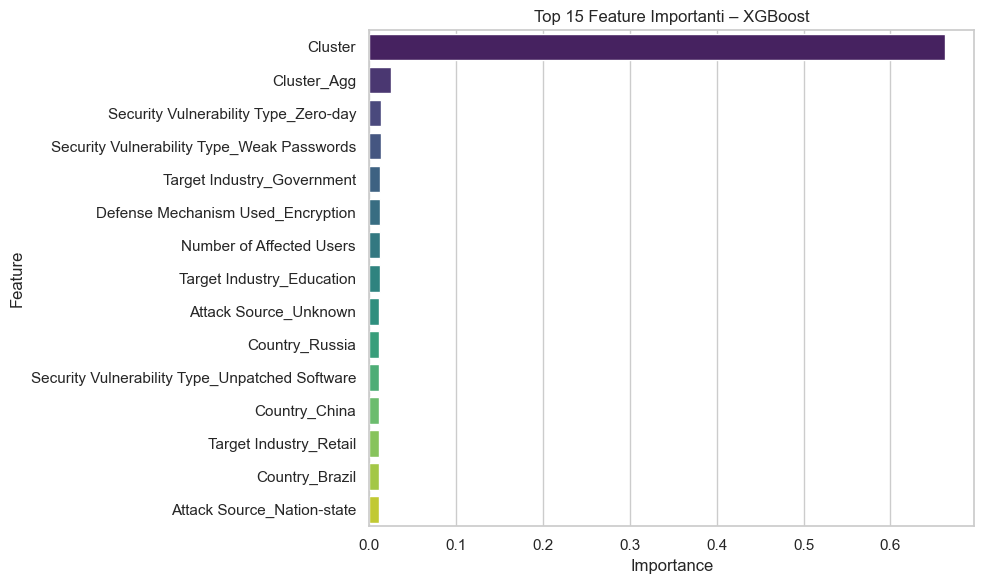

In [78]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pulizia e encoding
df_clean = df.dropna()
categorical_cols = ['Attack Type', 'Target Industry', 'Attack Source',
                    'Security Vulnerability Type', 'Defense Mechanism Used', 'Country']
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# Target: Financial Loss
target = 'Financial Loss (in Million $)'
X = df_encoded.drop(columns=['Financial Loss (in Million $)', 'Incident Resolution Time (in Hours)'])
y = df_encoded[target]

# Train-test split e scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modello XGBoost
model = XGBRegressor(random_state=42, verbosity=0)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Metriche
results = {
    'R2': r2_score(y_test, y_pred),
    'MAE': mean_absolute_error(y_test, y_pred),
    'RMSE': root_mean_squared_error(y_test, y_pred)
}
print("📊 Risultati XGBoost:", results)

# Importanza delle feature
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importances, x='Importance', y='Feature', palette='viridis')
plt.title("Top 15 Feature Importanti – XGBoost")
plt.tight_layout()
plt.show()


In [79]:
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.linear_model import LinearRegression, LassoCV
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Preparazione dei dati
df_clean = df.dropna()
categorical_cols = ['Attack Type', 'Target Industry', 'Attack Source',
                    'Security Vulnerability Type', 'Defense Mechanism Used', 'Country']
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

X = df_encoded.drop(columns=['Financial Loss (in Million $)', 'Incident Resolution Time (in Hours)'])
y = df_encoded['Financial Loss (in Million $)']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definizione modelli
models = {
    "Linear Regression": LinearRegression(),
    "LassoCV": LassoCV(cv=5),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0)
}

# KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Valutazione modelli
results = []

for name, model in models.items():
    y_pred = cross_val_predict(model, X_scaled, y, cv=kf)
    
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = mean_squared_error(y, y_pred, squared=False)

    results.append({
        'Model': name,
        'R2 (CV)': round(r2, 3),
        'MAE (CV)': round(mae, 2),
        'RMSE (CV)': round(rmse, 2)
    })

# Risultati in DataFrame
cv_results = pd.DataFrame(results)
cv_results


D:\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model  R2 (CV)  MAE (CV)  RMSE (CV)
0  Linear Regression    0.418     17.73      21.97
1            LassoCV    0.419     17.77      21.94
2            XGBoost    0.497     15.84      20.42

D:\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


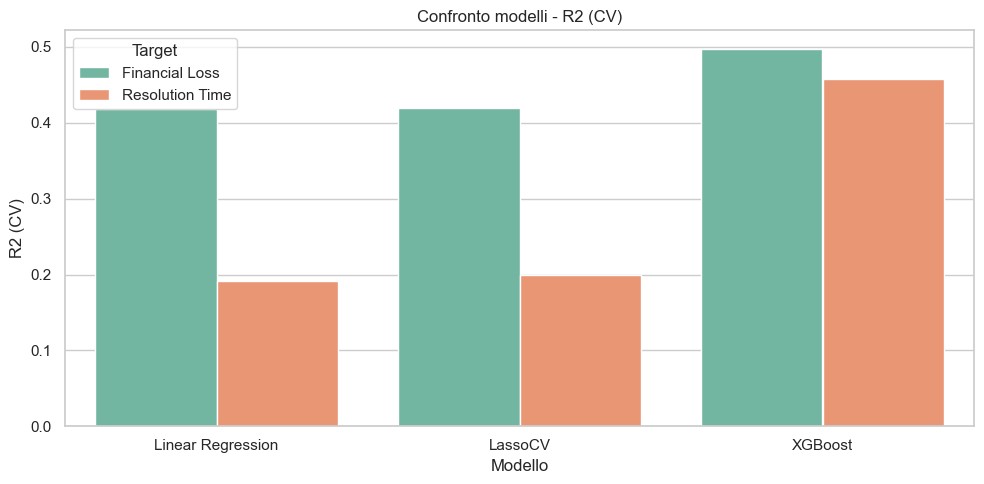

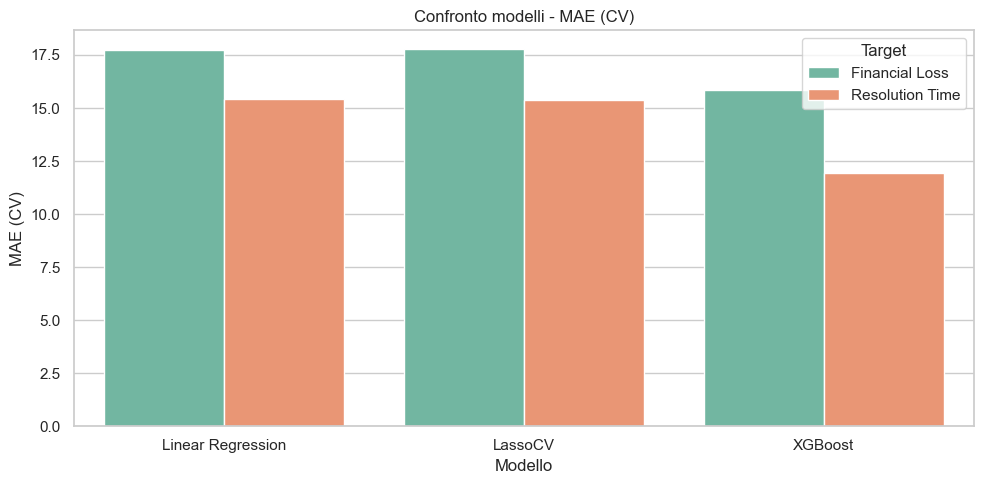

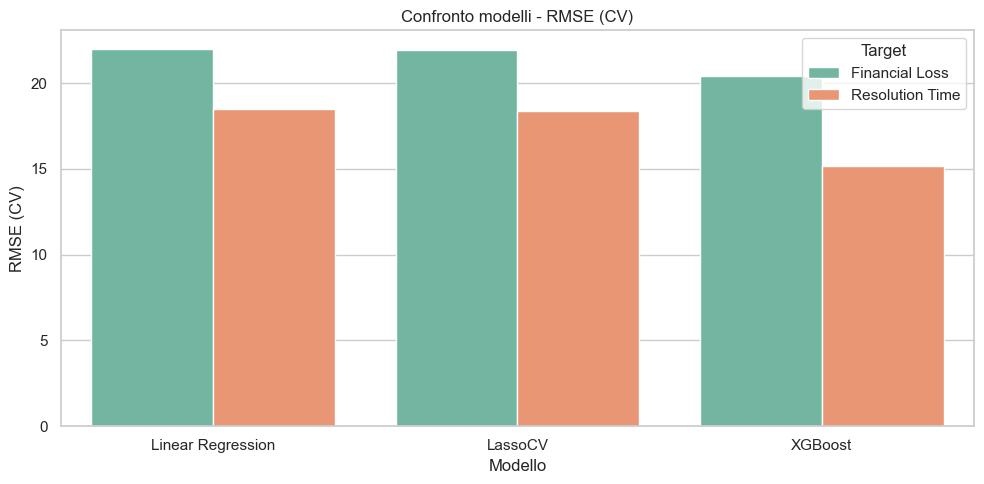


📋 Risultati cross-validation:
            Target              Model  R2 (CV)  MAE (CV)  RMSE (CV)
0   Financial Loss  Linear Regression    0.418     17.73      21.97
1   Financial Loss            LassoCV    0.419     17.77      21.94
2   Financial Loss            XGBoost    0.497     15.84      20.42
3  Resolution Time  Linear Regression    0.191     15.44      18.49
4  Resolution Time            LassoCV    0.200     15.40      18.39
5  Resolution Time            XGBoost    0.458     11.95      15.14


In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, LassoCV
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 1. Pre-processing
df_clean = df.dropna()
categorical_cols = ['Attack Type', 'Target Industry', 'Attack Source',
                    'Security Vulnerability Type', 'Defense Mechanism Used', 'Country']
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# 2. Definizione dei modelli
models = {
    "Linear Regression": LinearRegression(),
    "LassoCV": LassoCV(cv=5),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0)
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 3. Funzione per valutare i modelli
def evaluate_models(X, y, target_name):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    results = []
    for name, model in models.items():
        y_pred = cross_val_predict(model, X_scaled, y, cv=kf)

        r2 = r2_score(y, y_pred)
        mae = mean_absolute_error(y, y_pred)
        rmse = mean_squared_error(y, y_pred, squared=False)

        results.append({
            'Target': target_name,
            'Model': name,
            'R2 (CV)': round(r2, 3),
            'MAE (CV)': round(mae, 2),
            'RMSE (CV)': round(rmse, 2)
        })

    return pd.DataFrame(results)

# 4. Definizione target e valutazione
targets = {
    "Financial Loss (in Million $)": "Financial Loss",
    "Incident Resolution Time (in Hours)": "Resolution Time"
}

final_results = []

for col, label in targets.items():
    X = df_encoded.drop(columns=list(targets.keys()))
    y = df_encoded[col]
    final_results.append(evaluate_models(X, y, label))

final_df = pd.concat(final_results, ignore_index=True)

# 5. Visualizzazione grafica dei risultati
metrics = ['R2 (CV)', 'MAE (CV)', 'RMSE (CV)']

for metric in metrics:
    plt.figure(figsize=(10, 5))
    sns.barplot(data=final_df, x='Model', y=metric, hue='Target', palette='Set2')
    plt.title(f"Confronto modelli - {metric}")
    plt.ylabel(metric)
    plt.xlabel("Modello")
    plt.tight_layout()
    plt.show()

# 6. Stampa tabella riepilogativa
print("\n📋 Risultati cross-validation:")
print(final_df)


In [81]:
# Copia il DataFrame originale per formattarlo
highlight_df = final_df.copy()

# Funzione per trovare e marcare i migliori per ogni metrica per ogni target
def highlight_best_models(df):
    df_highlighted = df.copy()
    for target in df['Target'].unique():
        sub_df = df[df['Target'] == target]

        # Miglior R2 → più alto
        idx_r2 = sub_df['R2 (CV)'].idxmax()
        df_highlighted.loc[idx_r2, 'R2 (CV)'] = f"⭐ {df.loc[idx_r2, 'R2 (CV)']}"

        # MAE e RMSE → più bassi
        idx_mae = sub_df['MAE (CV)'].idxmin()
        df_highlighted.loc[idx_mae, 'MAE (CV)'] = f"⭐ {df.loc[idx_mae, 'MAE (CV)']}"

        idx_rmse = sub_df['RMSE (CV)'].idxmin()
        df_highlighted.loc[idx_rmse, 'RMSE (CV)'] = f"⭐ {df.loc[idx_rmse, 'RMSE (CV)']}"

    return df_highlighted

# Applica la funzione
highlighted_results = highlight_best_models(final_df)

# Visualizza
print("\n🌟 Modelli migliori evidenziati (⭐):")
print(highlighted_results.to_string(index=False))



🌟 Modelli migliori evidenziati (⭐):
         Target             Model R2 (CV) MAE (CV) RMSE (CV)
 Financial Loss Linear Regression   0.418    17.73     21.97
 Financial Loss           LassoCV   0.419    17.77     21.94
 Financial Loss           XGBoost ⭐ 0.497  ⭐ 15.84   ⭐ 20.42
Resolution Time Linear Regression   0.191    15.44     18.49
Resolution Time           LassoCV     0.2     15.4     18.39
Resolution Time           XGBoost ⭐ 0.458  ⭐ 11.95   ⭐ 15.14


C:\Users\frast\AppData\Local\Temp\ipykernel_20048\3318171991.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '⭐ 0.497' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_highlighted.loc[idx_r2, 'R2 (CV)'] = f"⭐ {df.loc[idx_r2, 'R2 (CV)']}"
C:\Users\frast\AppData\Local\Temp\ipykernel_20048\3318171991.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '⭐ 15.84' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_highlighted.loc[idx_mae, 'MAE (CV)'] = f"⭐ {df.loc[idx_mae, 'MAE (CV)']}"
C:\Users\frast\AppData\Local\Temp\ipykernel_20048\3318171991.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '⭐ 20.42' has dtype incompatible with float64, please explic